In [137]:
!pip3 install pdpbox
!pip3 install xgboost==1.7.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.1.1-cp39-cp39-linux_x86_64.whl
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
plotnine 0.10.1 requires matplotlib>=3.5.0, but you have matplotlib 3.1.1 which is incompatible.
mizani 0.8.1 requires matplotlib>=3.5.0, but you have matplotlib 3.1.1 which is incompatible.
arviz 0.15.1 requires matplotlib>=3.2, but you have matplotlib 3.1.1 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [138]:
# 중고차 분석

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import metrics

In [139]:
pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [140]:
pip install --upgrade matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.7.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.6 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.1
    Uninstalling matplotlib-3.1.1:
      Successfully uninstalled matplotlib-3.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pdpbox 0.2.1 requires matplotlib==3.1.1, but you have matplotlib 3.7.1 which is incompatible.


In [141]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from category_encoders import OrdinalEncoder
from sklearn.pipeline import make_pipeline
from pdpbox.pdp import pdp_isolate, pdp_plot
from pdpbox.pdp import pdp_interact, pdp_interact_plot
%config InlineBackend.figure_format='retina'

In [202]:
# audi
df_init = pd.read_csv('audi.csv')
df_init

model  year  price transmission  mileage fuelType  tax   mpg  engineSize
0        A1  2017  12500       Manual    15735   Petrol  150  55.4         1.4
1        A6  2016  16500    Automatic    36203   Diesel   20  64.2         2.0
2        A1  2016  11000       Manual    29946   Petrol   30  55.4         1.4
3        A4  2017  16800    Automatic    25952   Diesel  145  67.3         2.0
4        A3  2019  17300       Manual     1998   Petrol  145  49.6         1.0
...     ...   ...    ...          ...      ...      ...  ...   ...         ...
10663    A3  2020  16999       Manual     4018   Petrol  145  49.6         1.0
10664    A3  2020  16999       Manual     1978   Petrol  150  49.6         1.0
10665    A3  2020  17199       Manual      609   Petrol  150  49.6         1.0
10666    Q3  2017  19499    Automatic     8646   Petrol  150  47.9         1.4
10667    Q3  2016  15999       Manual    11855   Petrol  150  47.9         1.4

[10668 rows x 9 columns]

In [203]:
df_init.describe() #75%랑 max 차이남 --> price도 최소 평균 최대 이상함

year          price        mileage           tax           mpg  \
count  10668.000000   10668.000000   10668.000000  10668.000000  10668.000000   
mean    2017.100675   22896.685039   24827.244001    126.011436     50.770022   
std        2.167494   11714.841888   23505.257205     67.170294     12.949782   
min     1997.000000    1490.000000       1.000000      0.000000     18.900000   
25%     2016.000000   15130.750000    5968.750000    125.000000     40.900000   
50%     2017.000000   20200.000000   19000.000000    145.000000     49.600000   
75%     2019.000000   27990.000000   36464.500000    145.000000     58.900000   
max     2020.000000  145000.000000  323000.000000    580.000000    188.300000   

         engineSize  
count  10668.000000  
mean       1.930709  
std        0.602957  
min        0.000000  
25%        1.500000  
50%        2.000000  
75%        2.000000  
max        6.300000

In [204]:
#피쳐 요약표
# 사이즈 확인, 데이터 타입, 결측치, 고유값 개수, 1-3번째 값
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

def resumetable(df):
    print(f'dataset shape: {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns=['data type'])
    summary = summary.rename(columns = {'index' : 'feature'})
    summary['number of missing value'] = df.isnull().sum().values
    summary['number of unique data'] = df.nunique().values
    summary['first value'] = df.iloc[0,:]
    summary['second value'] = df.iloc[1,:]
    summary['third value'] = df.iloc[2,:]
    
    return summary

resumetable(df_init)

dataset shape: (10668, 9)


data type  number of missing value  number of unique data  \
model           object                        0                     26   
year             int64                        0                     21   
price            int64                        0                   3260   
transmission    object                        0                      3   
mileage          int64                        0                   7725   
fuelType        object                        0                      3   
tax              int64                        0                     37   
mpg            float64                        0                    104   
engineSize     float64                        0                     19   

             first value second value third value  
model                 A1           A6          A1  
year                2017         2016        2016  
price              12500        16500       11000  
transmission      Manual    Automatic      Manual  
mileage            15735        36203       29946  
fuelType          Petrol       Diesel      Petrol  
tax                  150           20          30  
mpg                 55.4         64.2        55.4  
engineSize           1.4          2.0         1.4

In [205]:
import matplotlib.gridspec as gridspec

def plot_by_features(df, features, num_rows, num_cols, size=(12,18)):
    mpl.rc('font', size=9)#폰트
    plt.figure(figsize = size) #사이즈
    grid = gridspec.GridSpec(num_rows, num_cols) # 격자 개수 2*2
    plt.subplots_adjust(wspace = 0.5, hspace = 0.5) # 그래프 간의 사이 여백
    
    for idx, feature in enumerate(features):  # enumerate(features) -> index, value:1, model / 2, transmission
        ax = plt.subplot(grid[idx])
        sns.countplot(x=feature, data = df, palette = 'Set3', ax= ax)

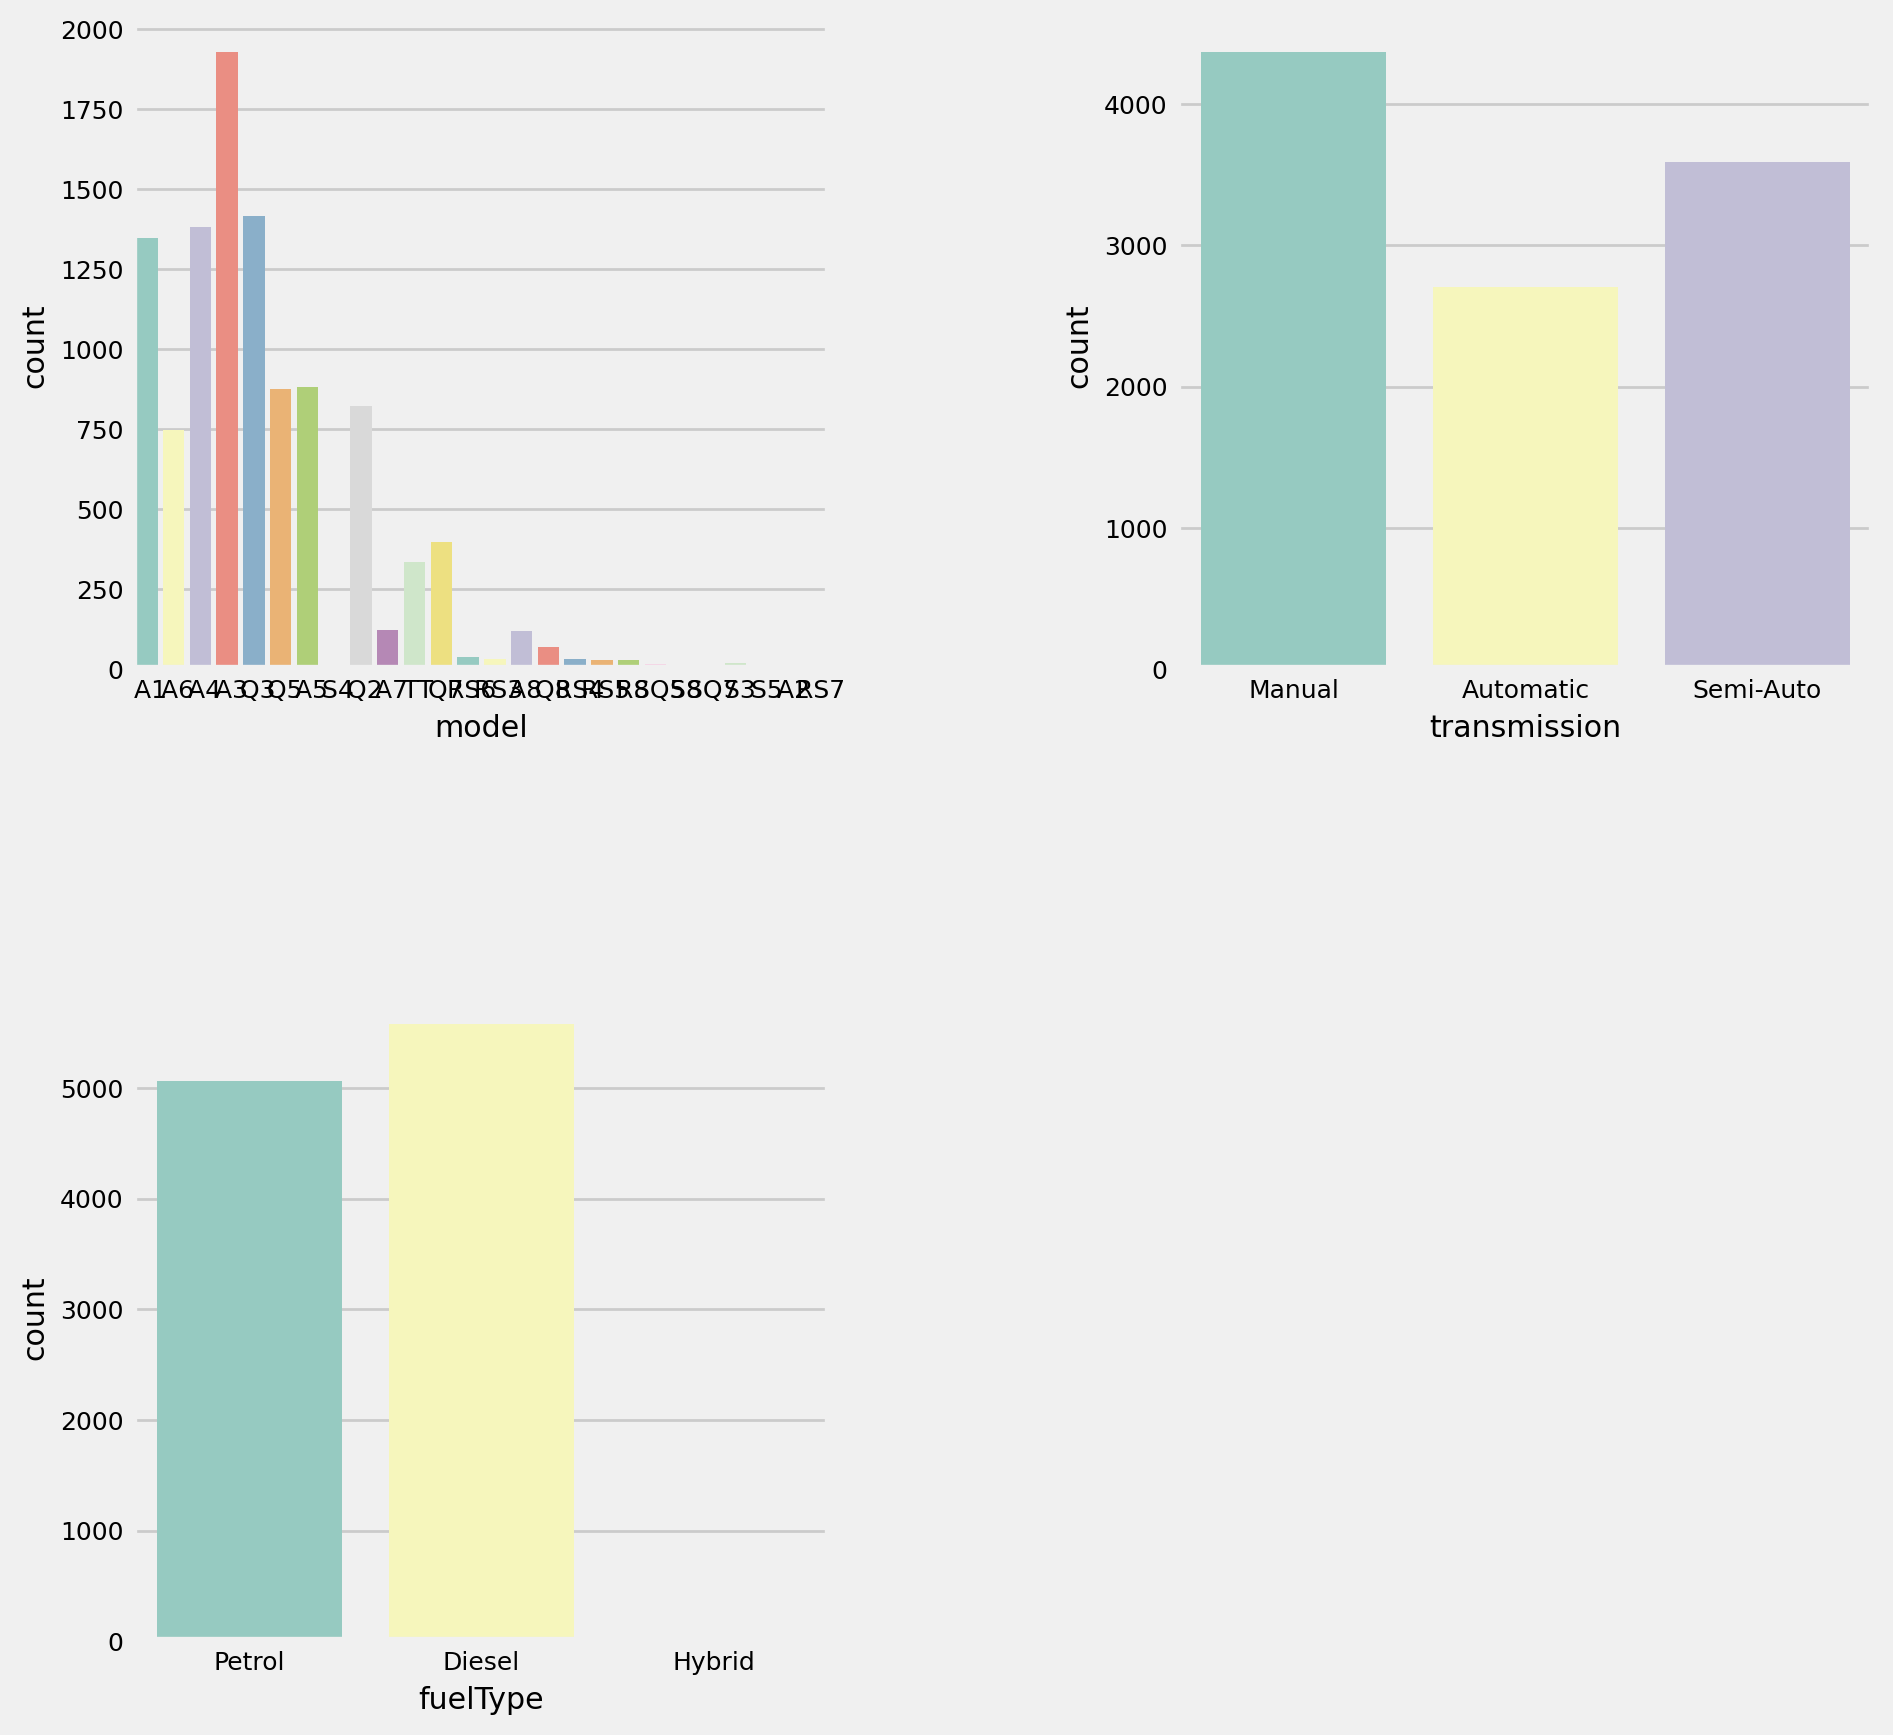

In [206]:
temp_list = ['model', 'transmission', 'fuelType'] #피쳐

plot_by_features(df_init, temp_list, 2, 2, size =(10, 10))

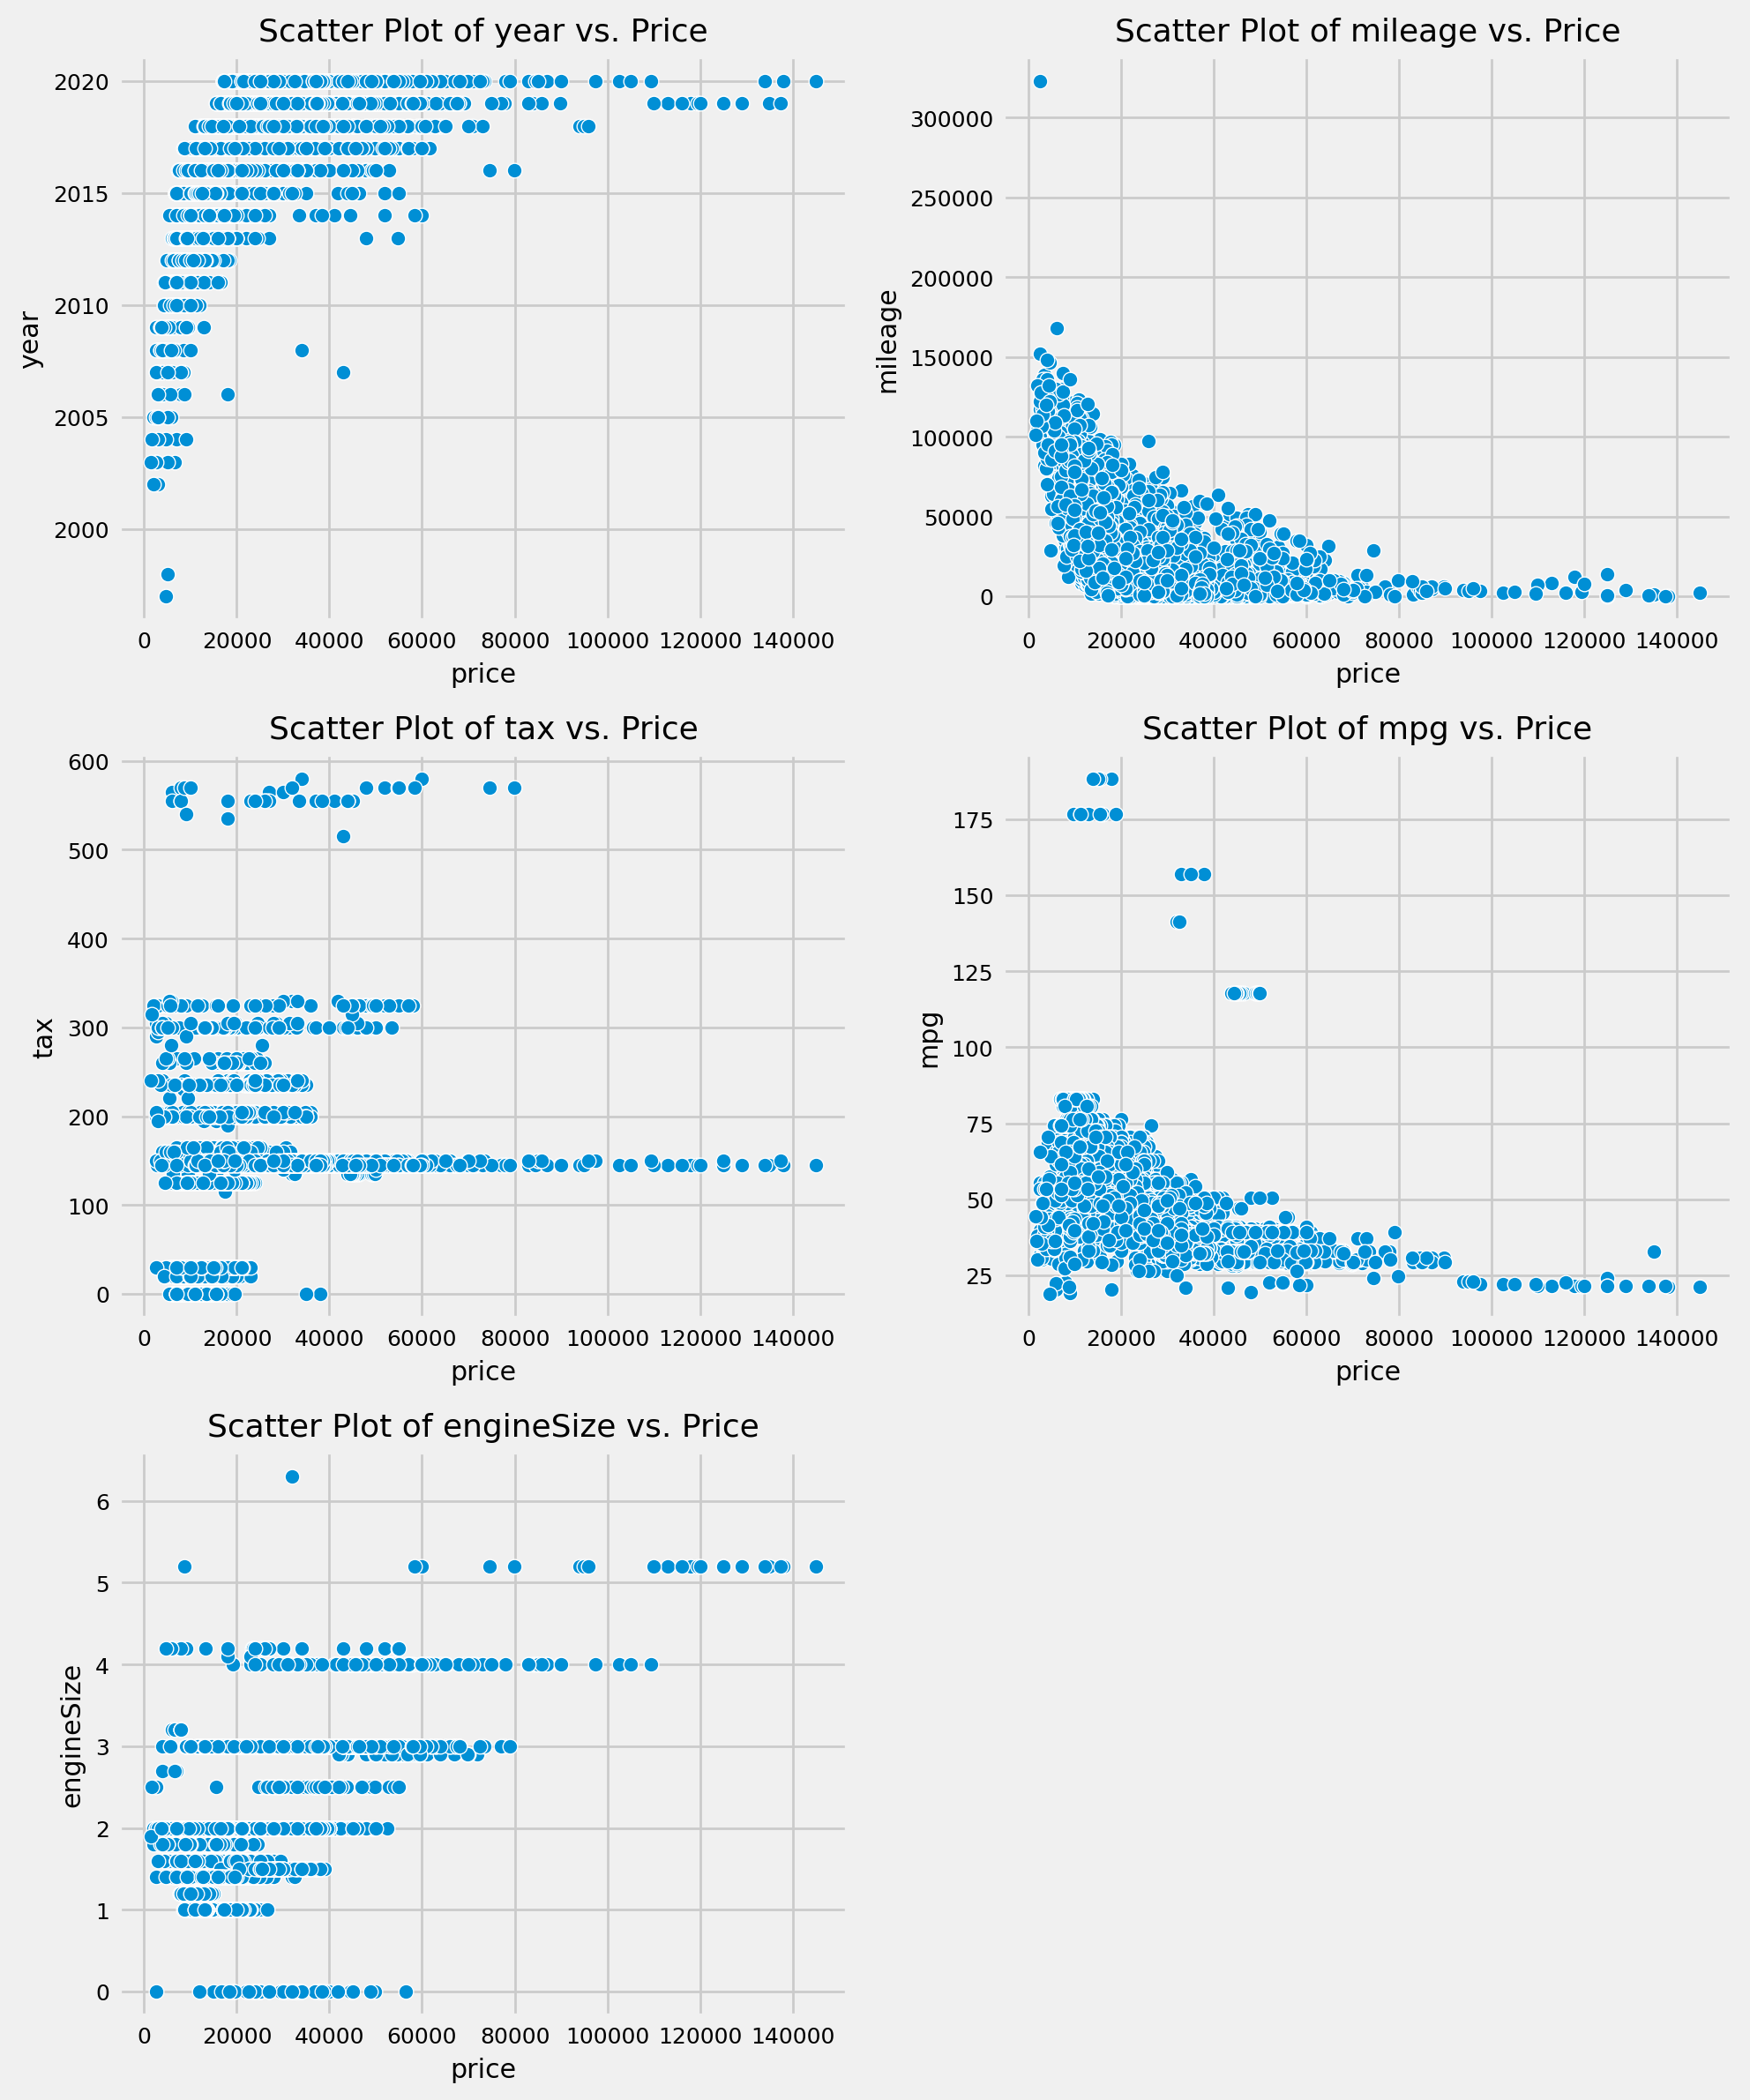

In [207]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 12))

sns.scatterplot(x='price', y='year', data=df_init, ax=axes[0, 0])
axes[0, 0].set_title('Scatter Plot of year vs. Price')

sns.scatterplot(x='price', y='mileage', data=df_init, ax=axes[0, 1])
axes[0, 1].set_title('Scatter Plot of mileage vs. Price')

sns.scatterplot(x='price', y='tax', data=df_init, ax=axes[1, 0])
axes[1, 0].set_title('Scatter Plot of tax vs. Price')

sns.scatterplot(x='price', y='mpg', data=df_init, ax=axes[1, 1])
axes[1, 1].set_title('Scatter Plot of mpg vs. Price')

sns.scatterplot(x='price', y='engineSize', data=df_init, ax=axes[2, 0])
axes[2, 0].set_title('Scatter Plot of engineSize vs. Price')

fig.delaxes(axes[2, 1])

plt.tight_layout()
plt.show()

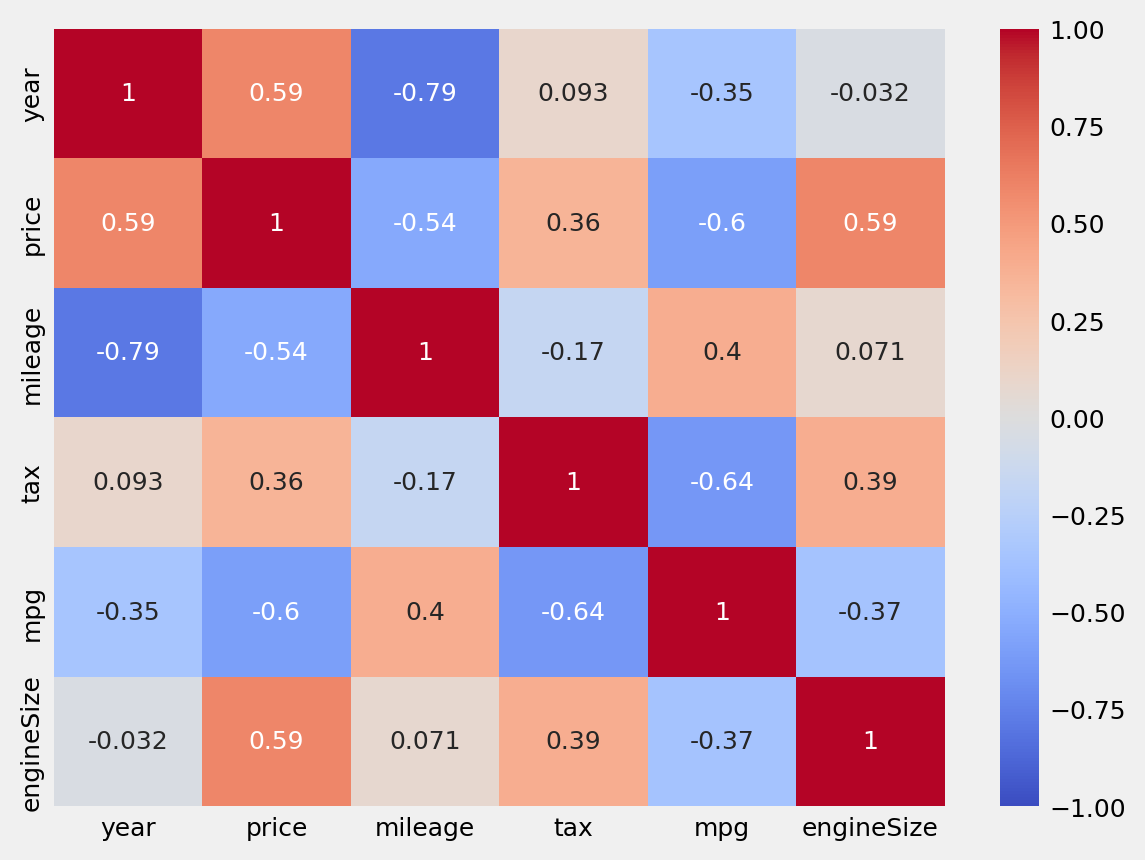

In [208]:
#상광계수 확인
sns.heatmap(data = df_init.corr(), vmin = -1, cmap='coolwarm', annot = True);

In [209]:
df_init = df_init.reset_index(drop = True)
df_init

model  year  price transmission  mileage fuelType  tax   mpg  engineSize
0        A1  2017  12500       Manual    15735   Petrol  150  55.4         1.4
1        A6  2016  16500    Automatic    36203   Diesel   20  64.2         2.0
2        A1  2016  11000       Manual    29946   Petrol   30  55.4         1.4
3        A4  2017  16800    Automatic    25952   Diesel  145  67.3         2.0
4        A3  2019  17300       Manual     1998   Petrol  145  49.6         1.0
...     ...   ...    ...          ...      ...      ...  ...   ...         ...
10663    A3  2020  16999       Manual     4018   Petrol  145  49.6         1.0
10664    A3  2020  16999       Manual     1978   Petrol  150  49.6         1.0
10665    A3  2020  17199       Manual      609   Petrol  150  49.6         1.0
10666    Q3  2017  19499    Automatic     8646   Petrol  150  47.9         1.4
10667    Q3  2016  15999       Manual    11855   Petrol  150  47.9         1.4

[10668 rows x 9 columns]

In [210]:
from sklearn.preprocessing import OrdinalEncoder

ordianl_encoder = OrdinalEncoder()

ordinal_data_encoded = ordianl_encoder.fit_transform(df_init[temp_list])
df_ordinal = pd.DataFrame(ordinal_data_encoded)
df_ordinal.columns = temp_list
df_ordinal

model  transmission  fuelType
0        0.0           1.0       2.0
1        5.0           0.0       0.0
2        0.0           1.0       2.0
3        3.0           0.0       0.0
4        2.0           1.0       2.0
...      ...           ...       ...
10663    2.0           1.0       2.0
10664    2.0           1.0       2.0
10665    2.0           1.0       2.0
10666    9.0           0.0       2.0
10667    9.0           1.0       2.0

[10668 rows x 3 columns]

In [211]:
{index: label for index, label in enumerate(ordianl_encoder.categories_[0])} #model

#수치형 데이터로 변환 -- 수치형 데이터로 변환하면, 서로 간의 관계성이 생긴다


{0: ' A1',
 1: ' A2',
 2: ' A3',
 3: ' A4',
 4: ' A5',
 5: ' A6',
 6: ' A7',
 7: ' A8',
 8: ' Q2',
 9: ' Q3',
 10: ' Q5',
 11: ' Q7',
 12: ' Q8',
 13: ' R8',
 14: ' RS3',
 15: ' RS4',
 16: ' RS5',
 17: ' RS6',
 18: ' RS7',
 19: ' S3',
 20: ' S4',
 21: ' S5',
 22: ' S8',
 23: ' SQ5',
 24: ' SQ7',
 25: ' TT'}

In [212]:
{index: label for index, label in enumerate(ordianl_encoder.categories_[1])} # transmission

{0: 'Automatic', 1: 'Manual', 2: 'Semi-Auto'}

In [213]:
{index: label for index, label in enumerate(ordianl_encoder.categories_[2])} # fuel type

{0: 'Diesel', 1: 'Hybrid', 2: 'Petrol'}

In [214]:
df_init.drop(temp_list, axis=1, inplace = True)

In [215]:
df = pd.concat([df_init, df_ordinal], axis =1 )
df

year  price  mileage  tax   mpg  engineSize  model  transmission  \
0      2017  12500    15735  150  55.4         1.4    0.0           1.0   
1      2016  16500    36203   20  64.2         2.0    5.0           0.0   
2      2016  11000    29946   30  55.4         1.4    0.0           1.0   
3      2017  16800    25952  145  67.3         2.0    3.0           0.0   
4      2019  17300     1998  145  49.6         1.0    2.0           1.0   
...     ...    ...      ...  ...   ...         ...    ...           ...   
10663  2020  16999     4018  145  49.6         1.0    2.0           1.0   
10664  2020  16999     1978  150  49.6         1.0    2.0           1.0   
10665  2020  17199      609  150  49.6         1.0    2.0           1.0   
10666  2017  19499     8646  150  47.9         1.4    9.0           0.0   
10667  2016  15999    11855  150  47.9         1.4    9.0           1.0   

       fuelType  
0           2.0  
1           0.0  
2           2.0  
3           0.0  
4           2.0  
...         ...  
10663       2.0  
10664       2.0  
10665       2.0  
10666       2.0  
10667       2.0  

[10668 rows x 9 columns]

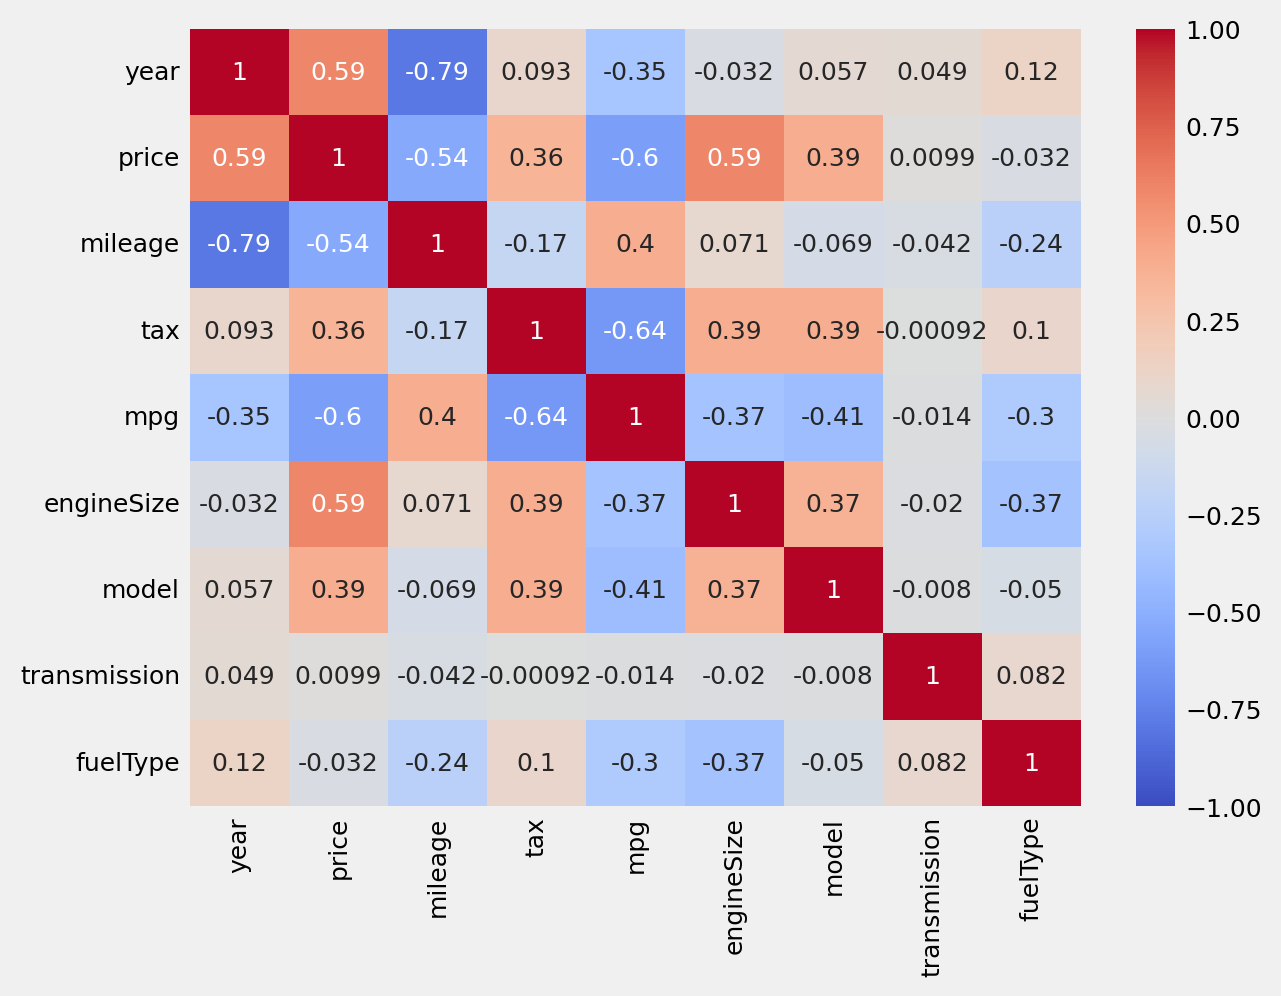

In [216]:
sns.heatmap(data = df.corr(), vmin = -1, cmap='coolwarm', annot = True);

# 베이스 모델

In [217]:
df = pd.get_dummies(df,columns=['model', 'transmission','fuelType']).copy() # 더미 데이터

In [218]:
x_data = df.drop('price', axis = 1)
y_data = df['price']

# min max 조정
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(copy=True, feature_range=(0, 1))
x_data = scaler.fit_transform(x_data)
x_data = pd.DataFrame(x_data)

In [219]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.1, random_state = 97)

X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(9601, 37)
(1067, 37)
(9601,)
(1067,)


In [220]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

print('Accuracy on Testing set: %.1f ' %(regressor.score(X_train,y_train)*100))

Accuracy on Testing set: 88.9 


In [221]:
results = X_test.copy()
results["predicted"] = regressor.predict(X_test)
results["actual"]= y_test

results = results[['predicted', 'actual']]
results['actual'] = results['actual'].round(3)
results['predicted'] = results['predicted'].round(3)
results

predicted  actual
0       29708.0   19990
1       19004.0   18995
2       14304.0   17695
3       30476.0   28495
4       57176.0   84999
...         ...     ...
1062    34396.0   34000
1063    31588.0   29000
1064    17552.0   17998
1065    24116.0   21395
1066     8740.0    9798

[1067 rows x 2 columns]

# 성능 향상

(10568, 38)

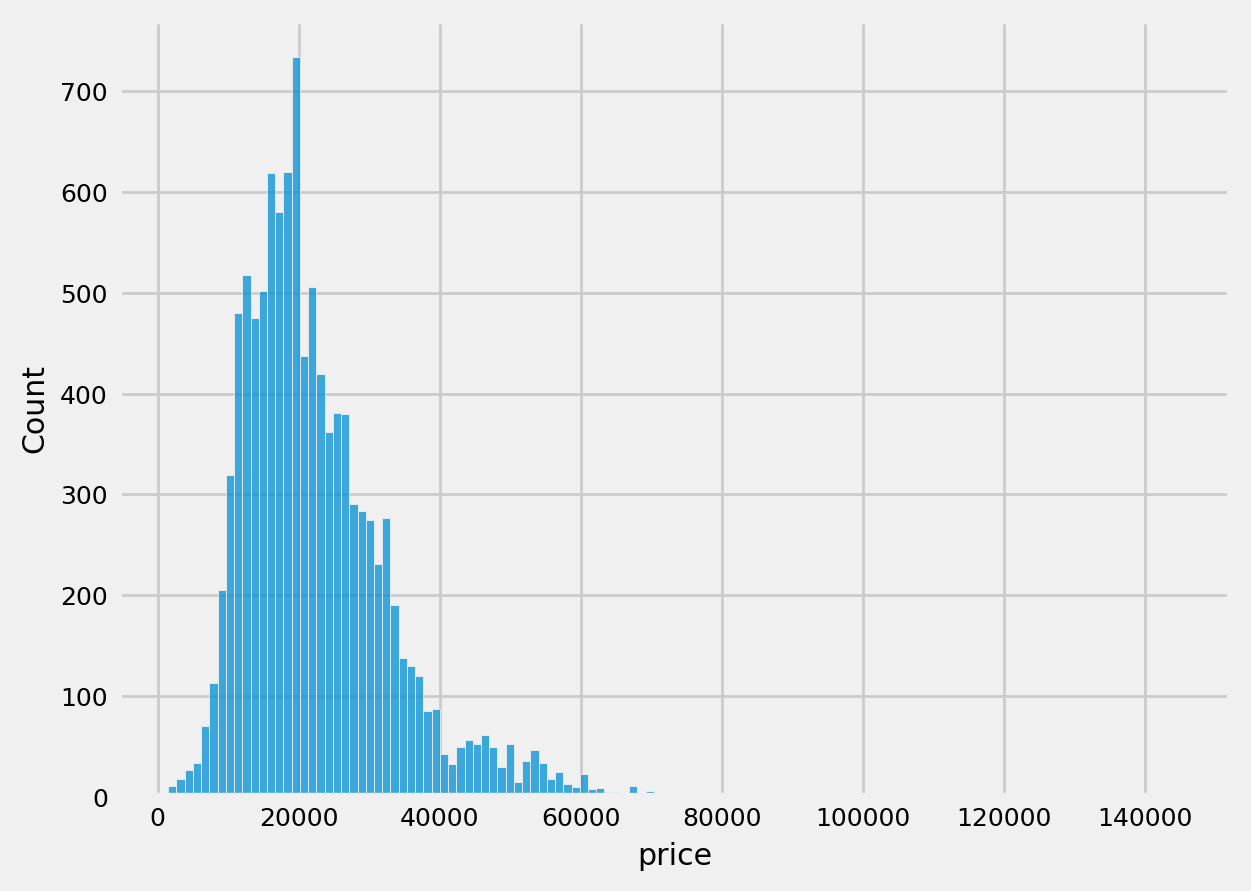

In [222]:
# price 및 각 데이터 outlier 체크
sns.histplot(df['price'])
# 60000 이상 제거
df = df[df['price'] <= 60000]
df.shape


<Axes: xlabel='price', ylabel='Count'>

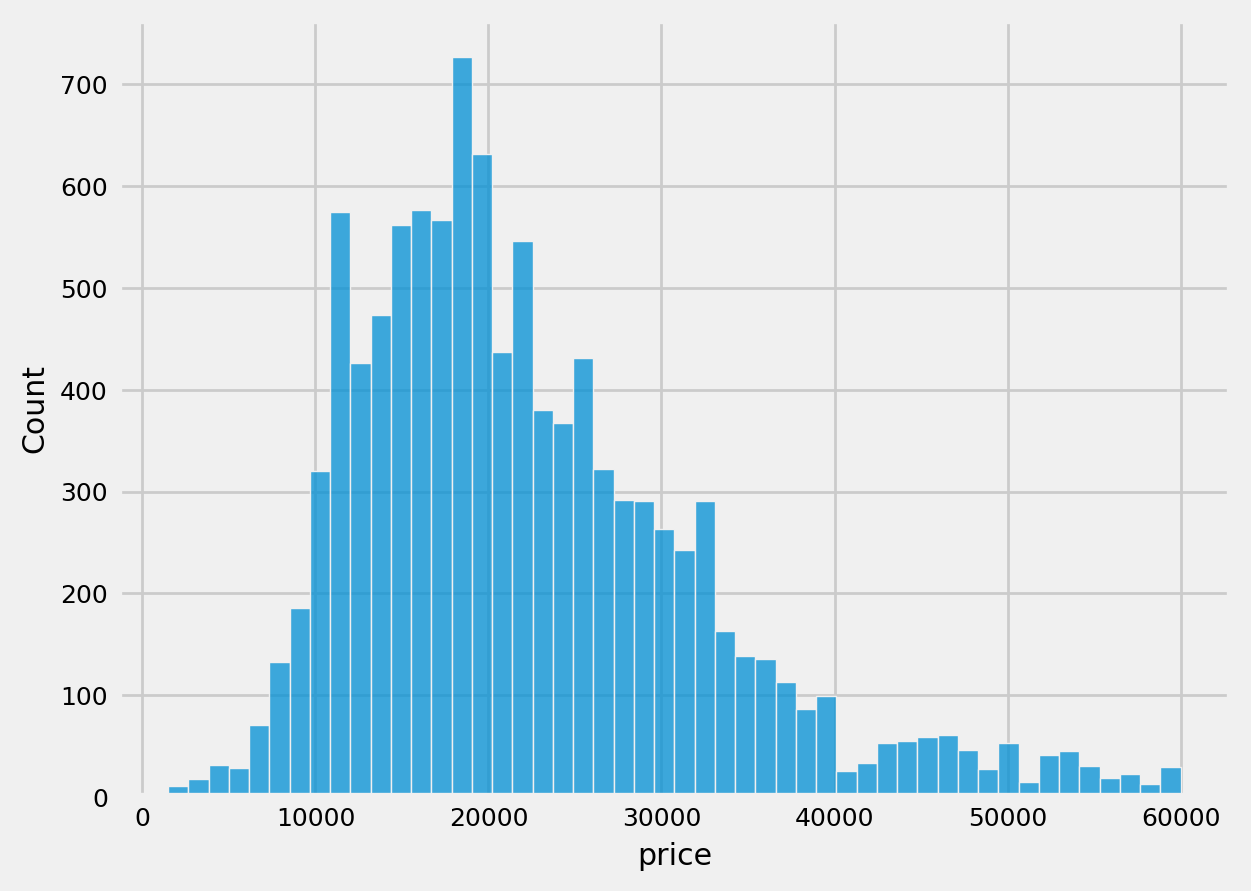

In [223]:
sns.histplot(df['price'])
#정규분포화 모양 비슷

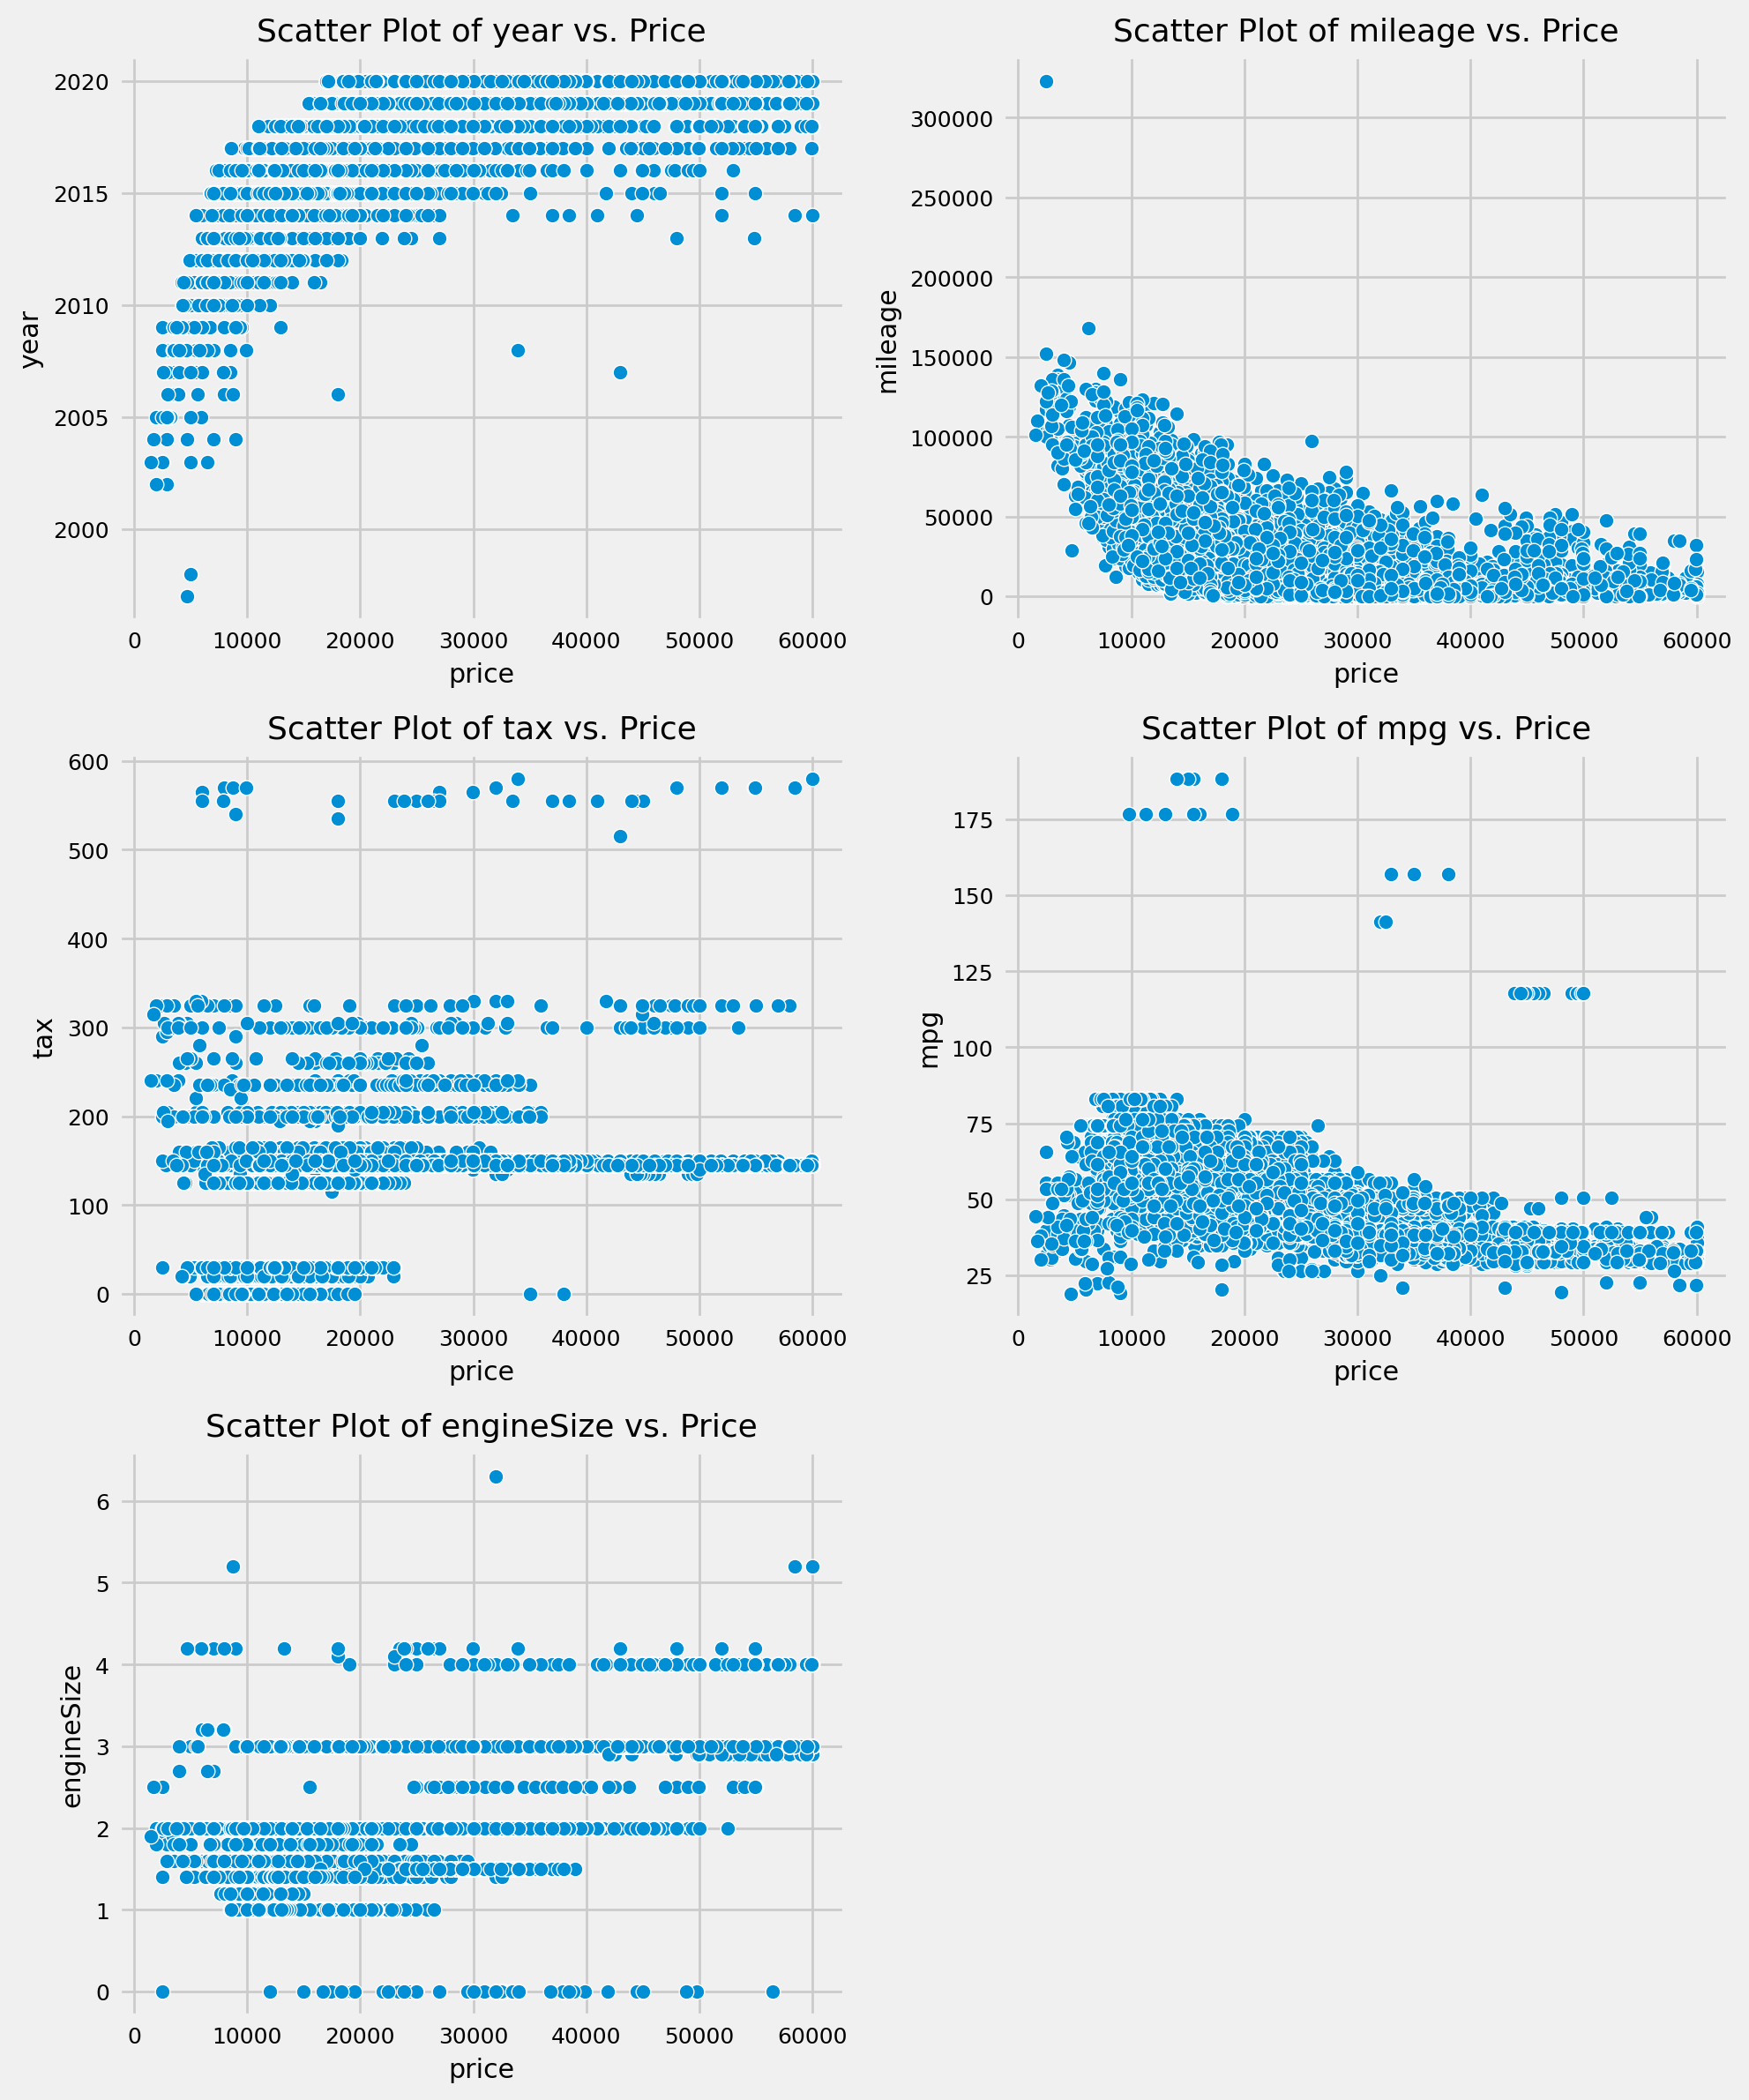

In [224]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 12))

sns.scatterplot(x='price', y='year', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Scatter Plot of year vs. Price')

sns.scatterplot(x='price', y='mileage', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Scatter Plot of mileage vs. Price')

sns.scatterplot(x='price', y='tax', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Scatter Plot of tax vs. Price')

sns.scatterplot(x='price', y='mpg', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Scatter Plot of mpg vs. Price')

sns.scatterplot(x='price', y='engineSize', data=df, ax=axes[2, 0])
axes[2, 0].set_title('Scatter Plot of engineSize vs. Price')

fig.delaxes(axes[2, 1])

plt.tight_layout()
plt.show()

In [225]:
# 이상치 제거
df = df[df['year'] > 2000]
df = df[df['mileage'] <= 150000]
df = df[df['tax'] <= 500]
df = df[df['mpg'] <= 100]
df = df[df['engineSize'] <= 5]

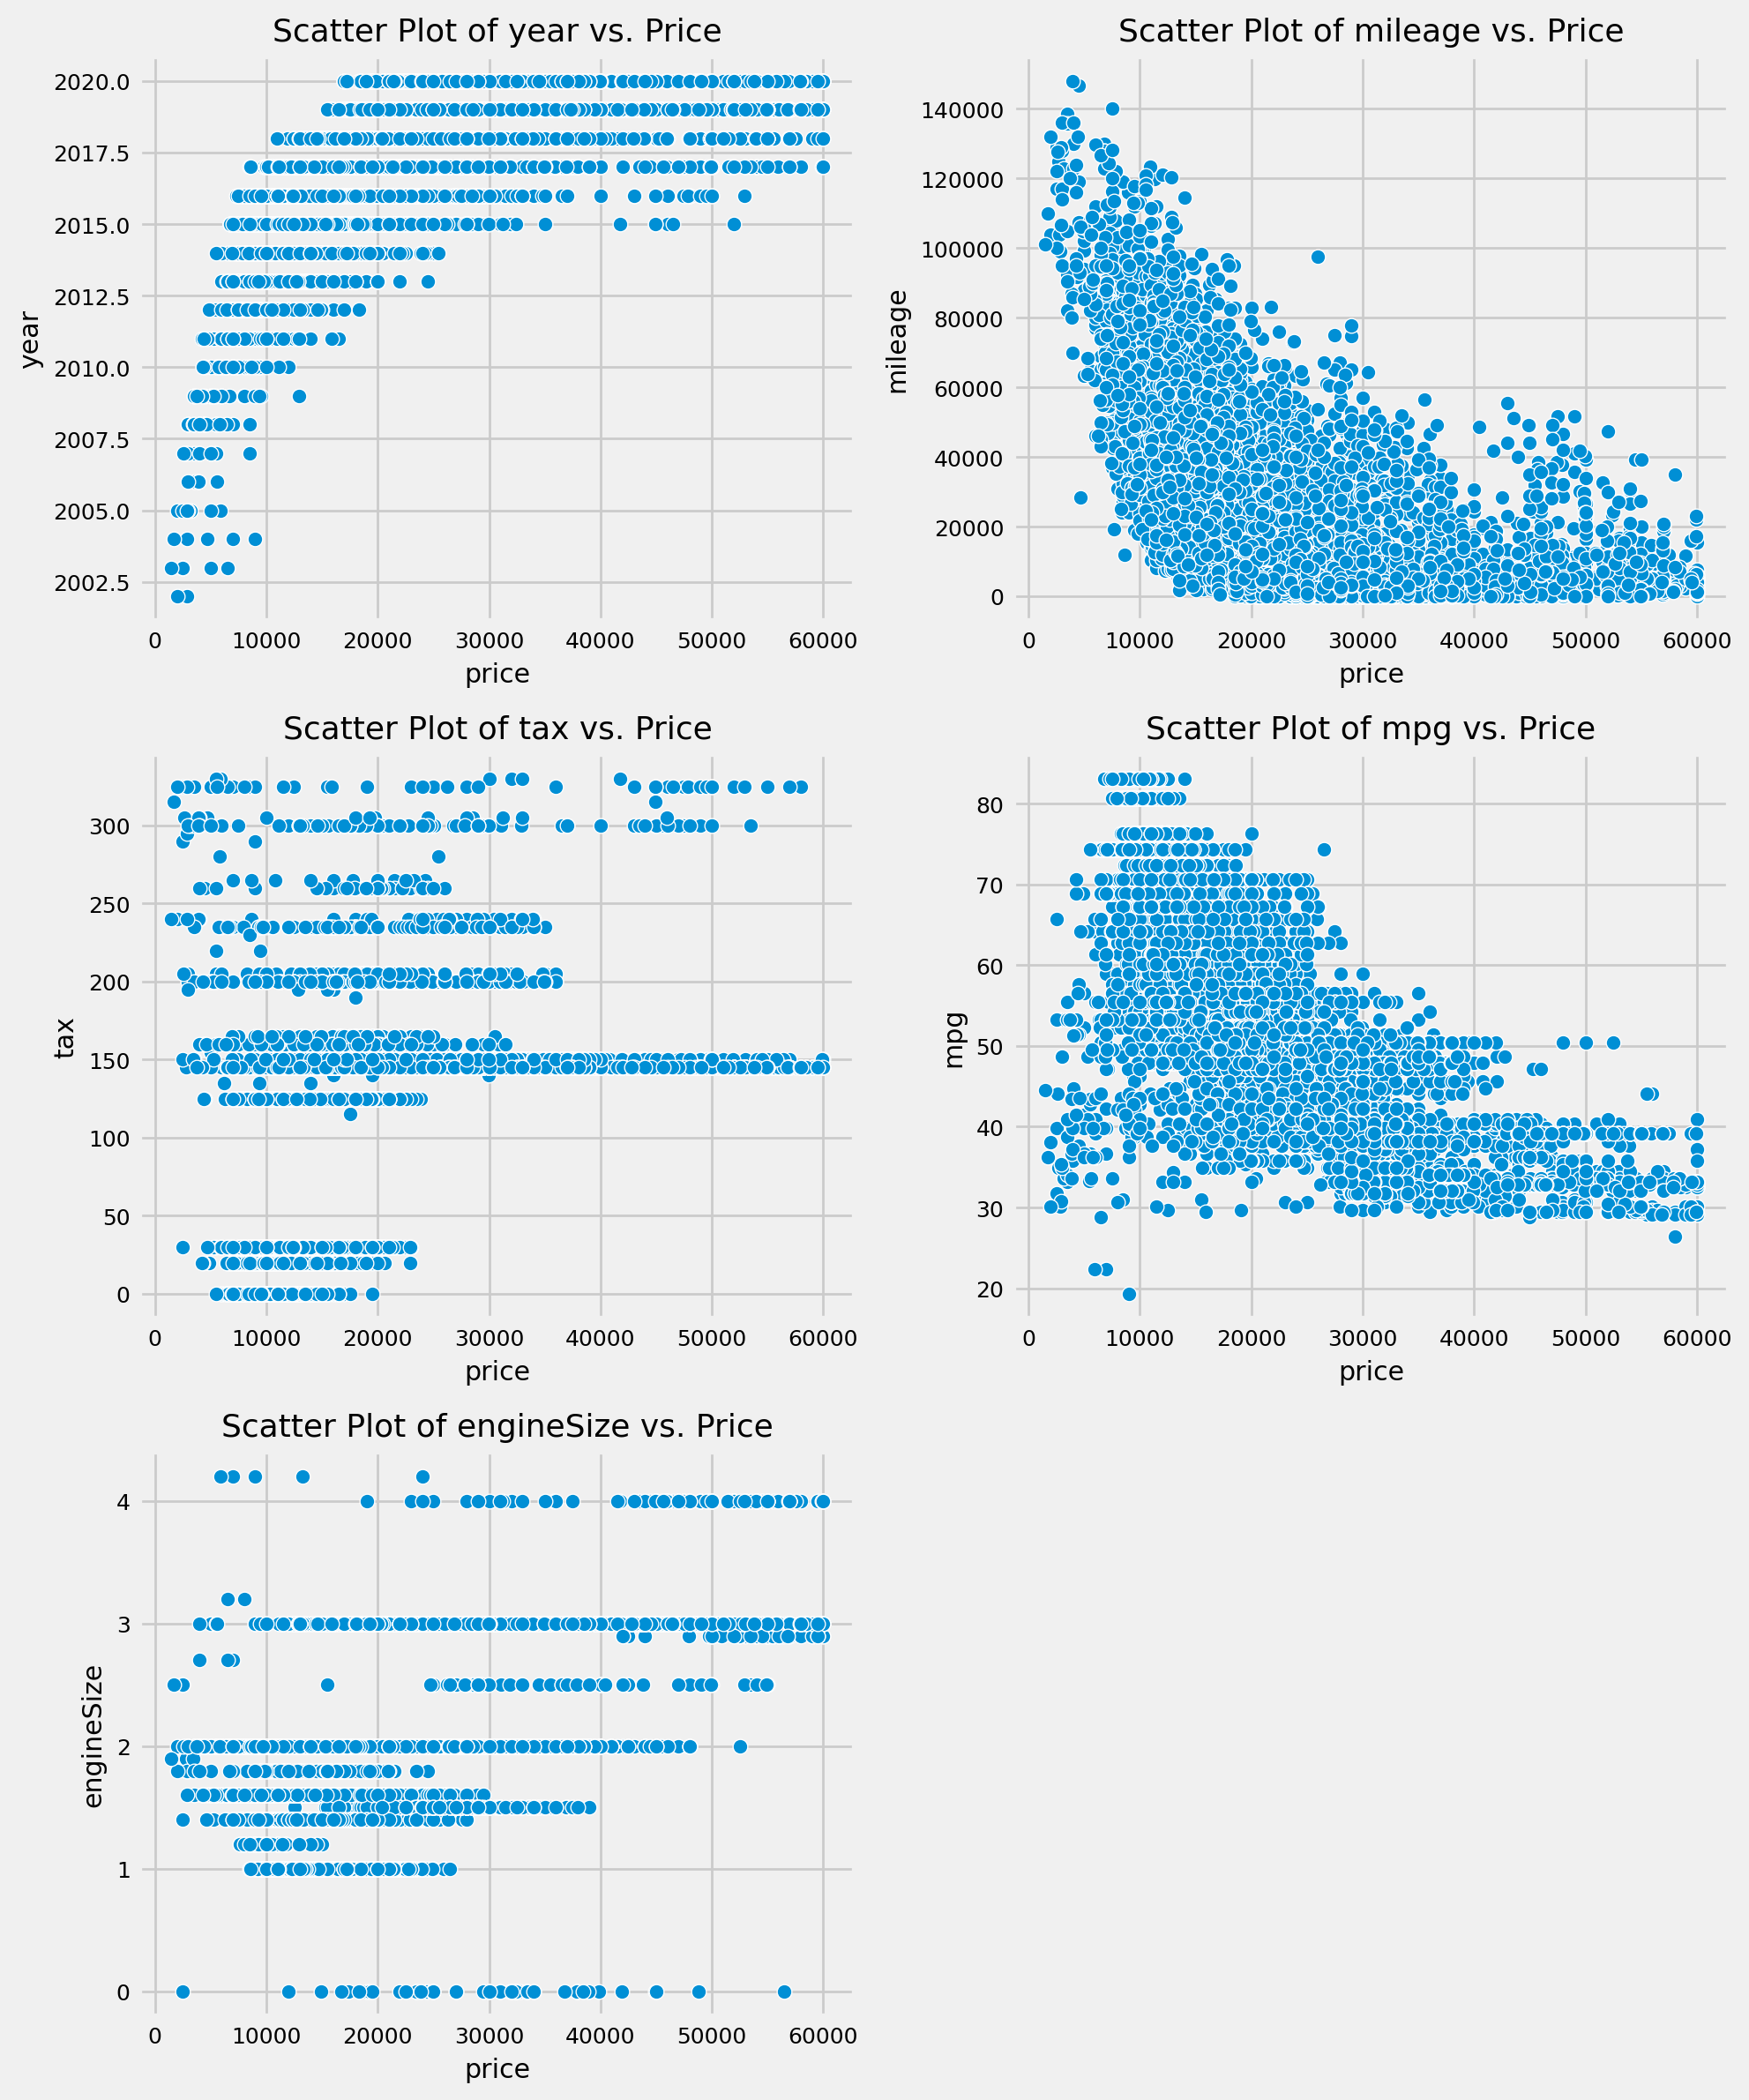

In [226]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 12))

sns.scatterplot(x='price', y='year', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Scatter Plot of year vs. Price')

sns.scatterplot(x='price', y='mileage', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Scatter Plot of mileage vs. Price')

sns.scatterplot(x='price', y='tax', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Scatter Plot of tax vs. Price')

sns.scatterplot(x='price', y='mpg', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Scatter Plot of mpg vs. Price')

sns.scatterplot(x='price', y='engineSize', data=df, ax=axes[2, 0])
axes[2, 0].set_title('Scatter Plot of engineSize vs. Price')

fig.delaxes(axes[2, 1])

plt.tight_layout()
plt.show()

In [227]:
x_data = df.drop('price', axis = 1)
y_data = df['price']

# min max 조정

scaler = MinMaxScaler(copy=True, feature_range=(0, 1))
x_data = scaler.fit_transform(x_data)
x_data = pd.DataFrame(x_data)

In [228]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, random_state = 97)

X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

print("X_train의 shape: ", X_train.shape)
print("X_test의 shape: ", X_test.shape)
print("y_train의 shape: ", y_train.shape)
print("y_test의 shape: ", y_test.shape)

X_train의 shape:  (7869, 37)
X_test의 shape:  (2623, 37)
y_train의 shape:  (7869,)
y_test의 shape:  (2623,)


In [229]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

print('Accuracy on Testing set: %.1f ' %(regressor.score(X_train,y_train)*100))

Accuracy on Testing set: 89.7 


In [230]:
results = X_test.copy()
results["predicted"] = regressor.predict(X_test)
results["actual"]= y_test

results = results[['predicted', 'actual']]
results['actual'] = results['actual'].round(3)
results['predicted'] = results['predicted'].round(3)
results

predicted  actual
0     17952.775   17699
1     23304.019   25950
2     11400.654   10999
3     28452.131   25450
4     29609.924   29980
...         ...     ...
2618  30864.651   26700
2619  29293.967   27995
2620  31005.890   37000
2621  10867.879   12950
2622  22967.463   21995

[2623 rows x 2 columns]

# price log 취하기

In [231]:
#PRICE LOG 
df["price"] = np.log1p(df["price"])

x_data = df.drop('price', axis = 1)
y_data = df['price']

In [232]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, random_state = 97)

X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

print("X_train의 shape: ", X_train.shape)
print("X_test의 shape: ", X_test.shape)
print("y_train의 shape: ", y_train.shape)
print("y_test의 shape: ", y_test.shape)

X_train의 shape:  (7869, 37)
X_test의 shape:  (2623, 37)
y_train의 shape:  (7869,)
y_test의 shape:  (2623,)


In [233]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

print('Accuracy on Testing set: %.1f ' %(regressor.score(X_train,y_train)*100))

Accuracy on Testing set: 93.5 


In [234]:
results = X_test.copy()
results["predicted"] = regressor.predict(X_test)
results["actual"]= y_test

results = results[['predicted', 'actual']]
results['actual'] = results['actual'].apply(np.expm1).round(3)
results['predicted'] = results['predicted'].apply(np.expm1).round(3)
results

predicted   actual
0     16085.421  17699.0
1     21937.810  25950.0
2     11905.758  10999.0
3     26979.936  25450.0
4     29769.882  29980.0
...         ...      ...
2618  30348.891  26700.0
2619  27623.709  27995.0
2620  33482.893  37000.0
2621  11777.634  12950.0
2622  22072.946  21995.0

[2623 rows x 2 columns]

# ridge 

In [235]:
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=3,max_iter=1000,random_state=1)
ridge.fit(X_train,y_train)
print('Accuracy on Testing set: %.1f ' %(ridge.score(X_test,y_test)*100))

Accuracy on Testing set: 93.6 


In [236]:
results = X_test.copy()
results["predicted"] = ridge.predict(X_test)
results["actual"]= y_test

results = results[['predicted', 'actual']]
results['actual'] = results['actual'].apply(np.expm1).round(3)
results['predicted'] = results['predicted'].apply(np.expm1).round(3)
results

predicted   actual
0     16074.184  17699.0
1     21955.003  25950.0
2     11913.532  10999.0
3     27029.755  25450.0
4     29764.504  29980.0
...         ...      ...
2618  30492.375  26700.0
2619  27691.508  27995.0
2620  33525.599  37000.0
2621  11751.537  12950.0
2622  22085.024  21995.0

[2623 rows x 2 columns]

# random forest

In [237]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(random_state=1)
rf_reg.fit(X_train, y_train)
print('Accuracy on Testing set: %.1f ' %(rf_reg.score(X_test,y_test)*100))

Accuracy on Testing set: 95.5 


In [238]:
results = X_test.copy()
results["predicted"] = rf_reg.predict(X_test)
results["actual"]= y_test

results = results[['predicted', 'actual']]
results['actual'] = results['actual'].apply(np.expm1).round(3)
results['predicted'] = results['predicted'].apply(np.expm1).round(3)
results

predicted   actual
0     17146.807  17699.0
1     20619.714  25950.0
2     11560.636  10999.0
3     30486.997  25450.0
4     29571.958  29980.0
...         ...      ...
2618  30463.024  26700.0
2619  28473.242  27995.0
2620  32506.418  37000.0
2621  11965.029  12950.0
2622  21289.179  21995.0

[2623 rows x 2 columns]

# light gbm model

In [239]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV

LGBM = LGBMRegressor(random_state=0)
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7, 9],
    'subsample': [0.5, 0.75, 1],
    'reg_lambda': [0.1, 1, 10, 100]
}

grid_search = GridSearchCV(LGBM, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best hyperparameters: ", grid_search.best_params_)
print("Performance score (LGBM): %.1f" % (grid_search.best_estimator_.score(X_test, y_test)*100))

Best hyperparameters:  {'learning_rate': 0.1, 'max_depth': 9, 'reg_lambda': 0.1, 'subsample': 0.5}
Performance score (LGBM): 95.8


In [240]:
results = X_test.copy()
results["predicted"] = grid_search.predict(X_test)
results["actual"]= y_test

results = results[['predicted', 'actual']]
results['actual'] = results['actual'].apply(np.expm1).round(3)
results['predicted'] = results['predicted'].apply(np.expm1).round(3)
results

predicted   actual
0     17418.384  17699.0
1     21317.379  25950.0
2     11547.440  10999.0
3     28208.334  25450.0
4     30347.517  29980.0
...         ...      ...
2618  30605.039  26700.0
2619  28135.697  27995.0
2620  33244.788  37000.0
2621  11742.548  12950.0
2622  21476.552  21995.0

[2623 rows x 2 columns]

# xgb

In [241]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

XGB = XGBRegressor(random_state=0)
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7, 9],
    'subsample': [0.5, 0.75, 1],
    'reg_lambda': [0.1, 1, 10, 100]
}

grid_search = GridSearchCV(XGB, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best hyperparameters: ", grid_search.best_params_)
print("Performance score (XGB): %.1f" % (grid_search.best_estimator_.score(X_test, y_test)*100))

Best hyperparameters:  {'learning_rate': 0.1, 'max_depth': 9, 'reg_lambda': 1, 'subsample': 0.75}
Performance score (XGB): 96.1


In [242]:
results = X_test.copy()
results["predicted"] = grid_search.predict(X_test)
results["actual"]= y_test

results = results[['predicted', 'actual']]
results['actual'] = results['actual'].apply(np.expm1).round(3)
results['predicted'] = results['predicted'].apply(np.expm1).round(3)
results

predicted   actual
0     17245.728516  17699.0
1     20579.775391  25950.0
2     11509.259766  10999.0
3     29143.644531  25450.0
4     30289.146484  29980.0
...            ...      ...
2618  30458.289062  26700.0
2619  26870.154297  27995.0
2620  33470.207031  37000.0
2621  11599.811523  12950.0
2622  21197.427734  21995.0

[2623 rows x 2 columns]

In [264]:
# 점수 비교 그래프
import matplotlib.pyplot as plt

#각 모델의 점수를 리스트에 저장
model_names=[ 'Regressor','Ridge', 'Random Forest','LGBM', 'XGB', ]
model_scores=[regressor.score(X_train,y_train),
                ridge.score(X_test,y_test),
                rf_reg.score(X_test,y_test),
                grid_search.best_estimator_.score(X_test, y_test),
                grid_search.best_estimator_.score(X_test, y_test)
                ]

# 리스트를 데이터프레임으로 변환
df_score= pd.DataFrame({'Model':model_names, 'Score': model_scores})

print(df_score)


           Model     Score
0      Regressor  0.934559
1          Ridge  0.935586
2  Random Forest  0.955339
3           LGBM  0.961312
4            XGB  0.961312


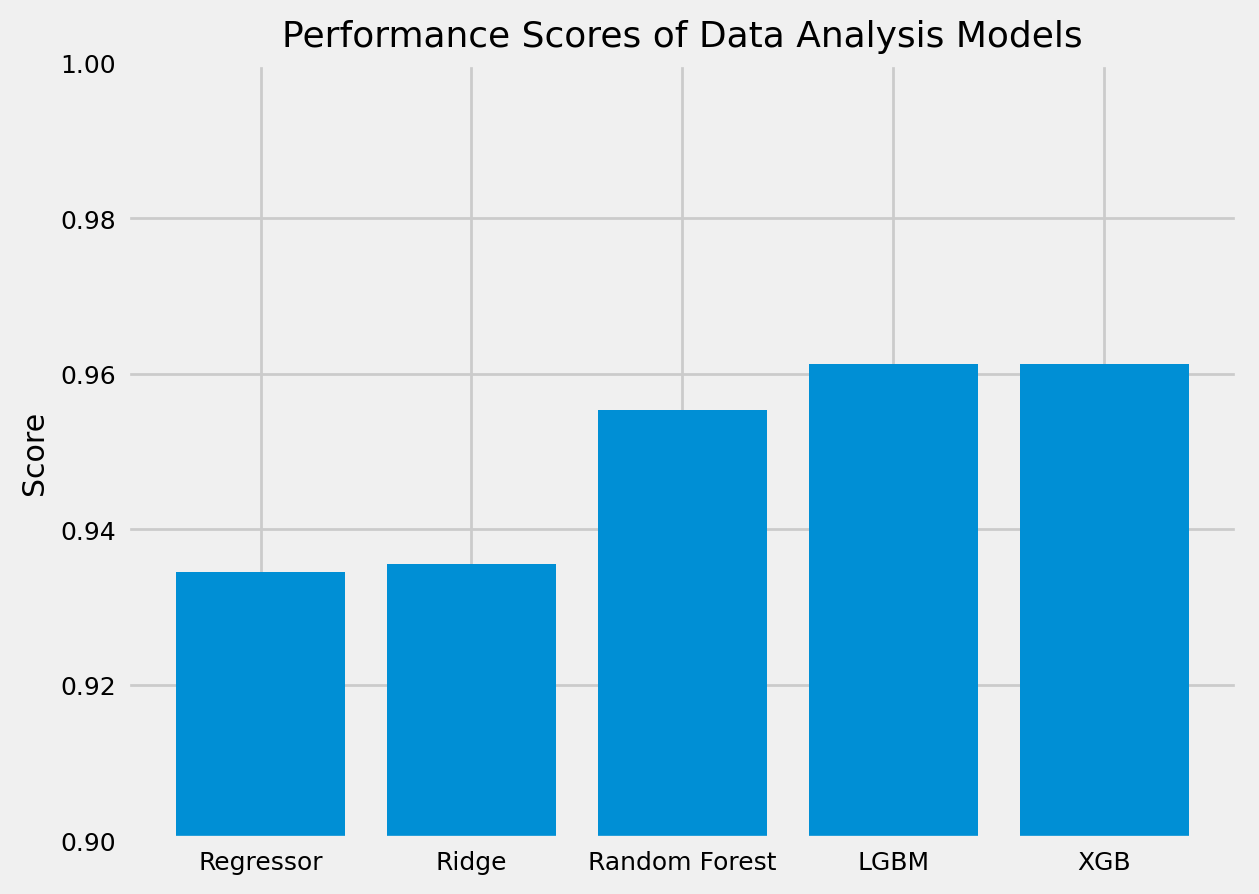

In [265]:
# 막대그래프 그리기

plt.bar(df_score['Model'], df_score['Score'])
plt.ylim(0.9,1) #y축 범위를 0.9-1로 정함
plt.title('Performance Scores of Data Analysis Models')
plt.ylabel('Score')
plt.show()

# ensemble model

In [247]:
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

lgbm = LGBMRegressor(random_state=0)
xgb = XGBRegressor(random_state=0)

ensemble = VotingRegressor(estimators=[('lgbm', lgbm), ('xgb', xgb)])

ensemble.fit(X_train, y_train)

print("Performance score (Ensemble): %.1f" % (ensemble.score(X_test, y_test)*100))

Performance score (Ensemble): 96.2


In [248]:
results = X_test.copy()
results["predicted"] = ensemble.predict(X_test)
results["actual"]= y_test

results = results[['predicted', 'actual']]
results['actual'] = results['actual'].apply(np.expm1).round(3)
results['predicted'] = results['predicted'].apply(np.expm1).round(3)
results

predicted   actual
0     17176.551  17699.0
1     21168.681  25950.0
2     11366.222  10999.0
3     28003.770  25450.0
4     30576.383  29980.0
...         ...      ...
2618  30310.430  26700.0
2619  27518.133  27995.0
2620  33161.808  37000.0
2621  11658.079  12950.0
2622  22038.219  21995.0

[2623 rows x 2 columns]

#차량 가격 예측

In [249]:
X_train.iloc[0,:] #첫 차량의 스펙 뽑아 가격 예측

year                2019.0
mileage             5000.0
tax                  150.0
mpg                   49.6
engineSize             1.6
model_0.0              0.0
model_1.0              0.0
model_2.0              0.0
model_3.0              0.0
model_4.0              0.0
model_5.0              0.0
model_6.0              0.0
model_7.0              0.0
model_8.0              1.0
model_9.0              0.0
model_10.0             0.0
model_11.0             0.0
model_12.0             0.0
model_13.0             0.0
model_14.0             0.0
model_15.0             0.0
model_16.0             0.0
model_17.0             0.0
model_18.0             0.0
model_19.0             0.0
model_20.0             0.0
model_21.0             0.0
model_22.0             0.0
model_23.0             0.0
model_24.0             0.0
model_25.0             0.0
transmission_0.0       0.0
transmission_1.0       1.0
transmission_2.0       0.0
fuelType_0.0           1.0
fuelType_1.0           0.0
fuelType_2.0           0.0
N

In [250]:
prediction = ensemble.predict(X_train.iloc[0,:].values.reshape(1, -1))
print(np.expm1(prediction))

[21285.90654466]


In [251]:
X_train.iloc[0,:].values

array([2.019e+03, 5.000e+03, 1.500e+02, 4.960e+01, 1.600e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
       0.000e+00])

In [252]:
print({index: label for index, label in enumerate(ordianl_encoder.categories_[0])})
print({index: label for index, label in enumerate(ordianl_encoder.categories_[1])})
print({index: label for index, label in enumerate(ordianl_encoder.categories_[2])})


{0: ' A1', 1: ' A2', 2: ' A3', 3: ' A4', 4: ' A5', 5: ' A6', 6: ' A7', 7: ' A8', 8: ' Q2', 9: ' Q3', 10: ' Q5', 11: ' Q7', 12: ' Q8', 13: ' R8', 14: ' RS3', 15: ' RS4', 16: ' RS5', 17: ' RS6', 18: ' RS7', 19: ' S3', 20: ' S4', 21: ' S5', 22: ' S8', 23: ' SQ5', 24: ' SQ7', 25: ' TT'}
{0: 'Automatic', 1: 'Manual', 2: 'Semi-Auto'}
{0: 'Diesel', 1: 'Hybrid', 2: 'Petrol'}


In [253]:
# 고객의 year, mileage, tax ,,, fuelType을 입력하면 예상 가격을 출력한다.
# year               2013.0
# mileage           20000.0
# tax                 120.0
# mpg                  36.7
# engineSize            2.0
# model                 0.0
# transmission          1.0
# fuelType              1.0            
customer_vehicle = np.array([2013, 20000, 120, 36.7, 2, 0,
       0, 0 ,0 ,0 , 1, 0,
       0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0,
       1])
prediction = ensemble.predict(customer_vehicle.reshape(1, -1))
print(f'predicted price: {np.expm1(prediction)[0]}')

predicted price: 16569.164071740775


In [254]:
# year               2017.0
# mileage            5000.0
# tax                 120.0
# mpg                  22.7
# engineSize            2.0
# model                 0.0
# transmission          1.0
# fuelType              1.0            
customer_vehicle = np.array([2017, 5000, 120, 22.7, 2, 0,
       0, 0 ,0 ,0 , 1, 0,
       0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0,
       1])
prediction = ensemble.predict(customer_vehicle.reshape(1, -1))
print(f'predicted price: {np.expm1(prediction)[0]}')

predicted price: 29446.685769042022


#pdp

In [255]:
XGB = make_pipeline(
    OrdinalEncoder(),
    XGBRegressor(random_state=42)
)
XGB.fit(X_train, y_train)
y_pred_train = XGB.predict(X_train)
# y_pred_val = XGB.predict(x_val)

In [256]:
x_train_encoded = XGB[0].transform(X_train)

In [257]:
from pdpbox.pdp import pdp_isolate, pdp_plot
from pdpbox.pdp import pdp_interact, pdp_interact_plot

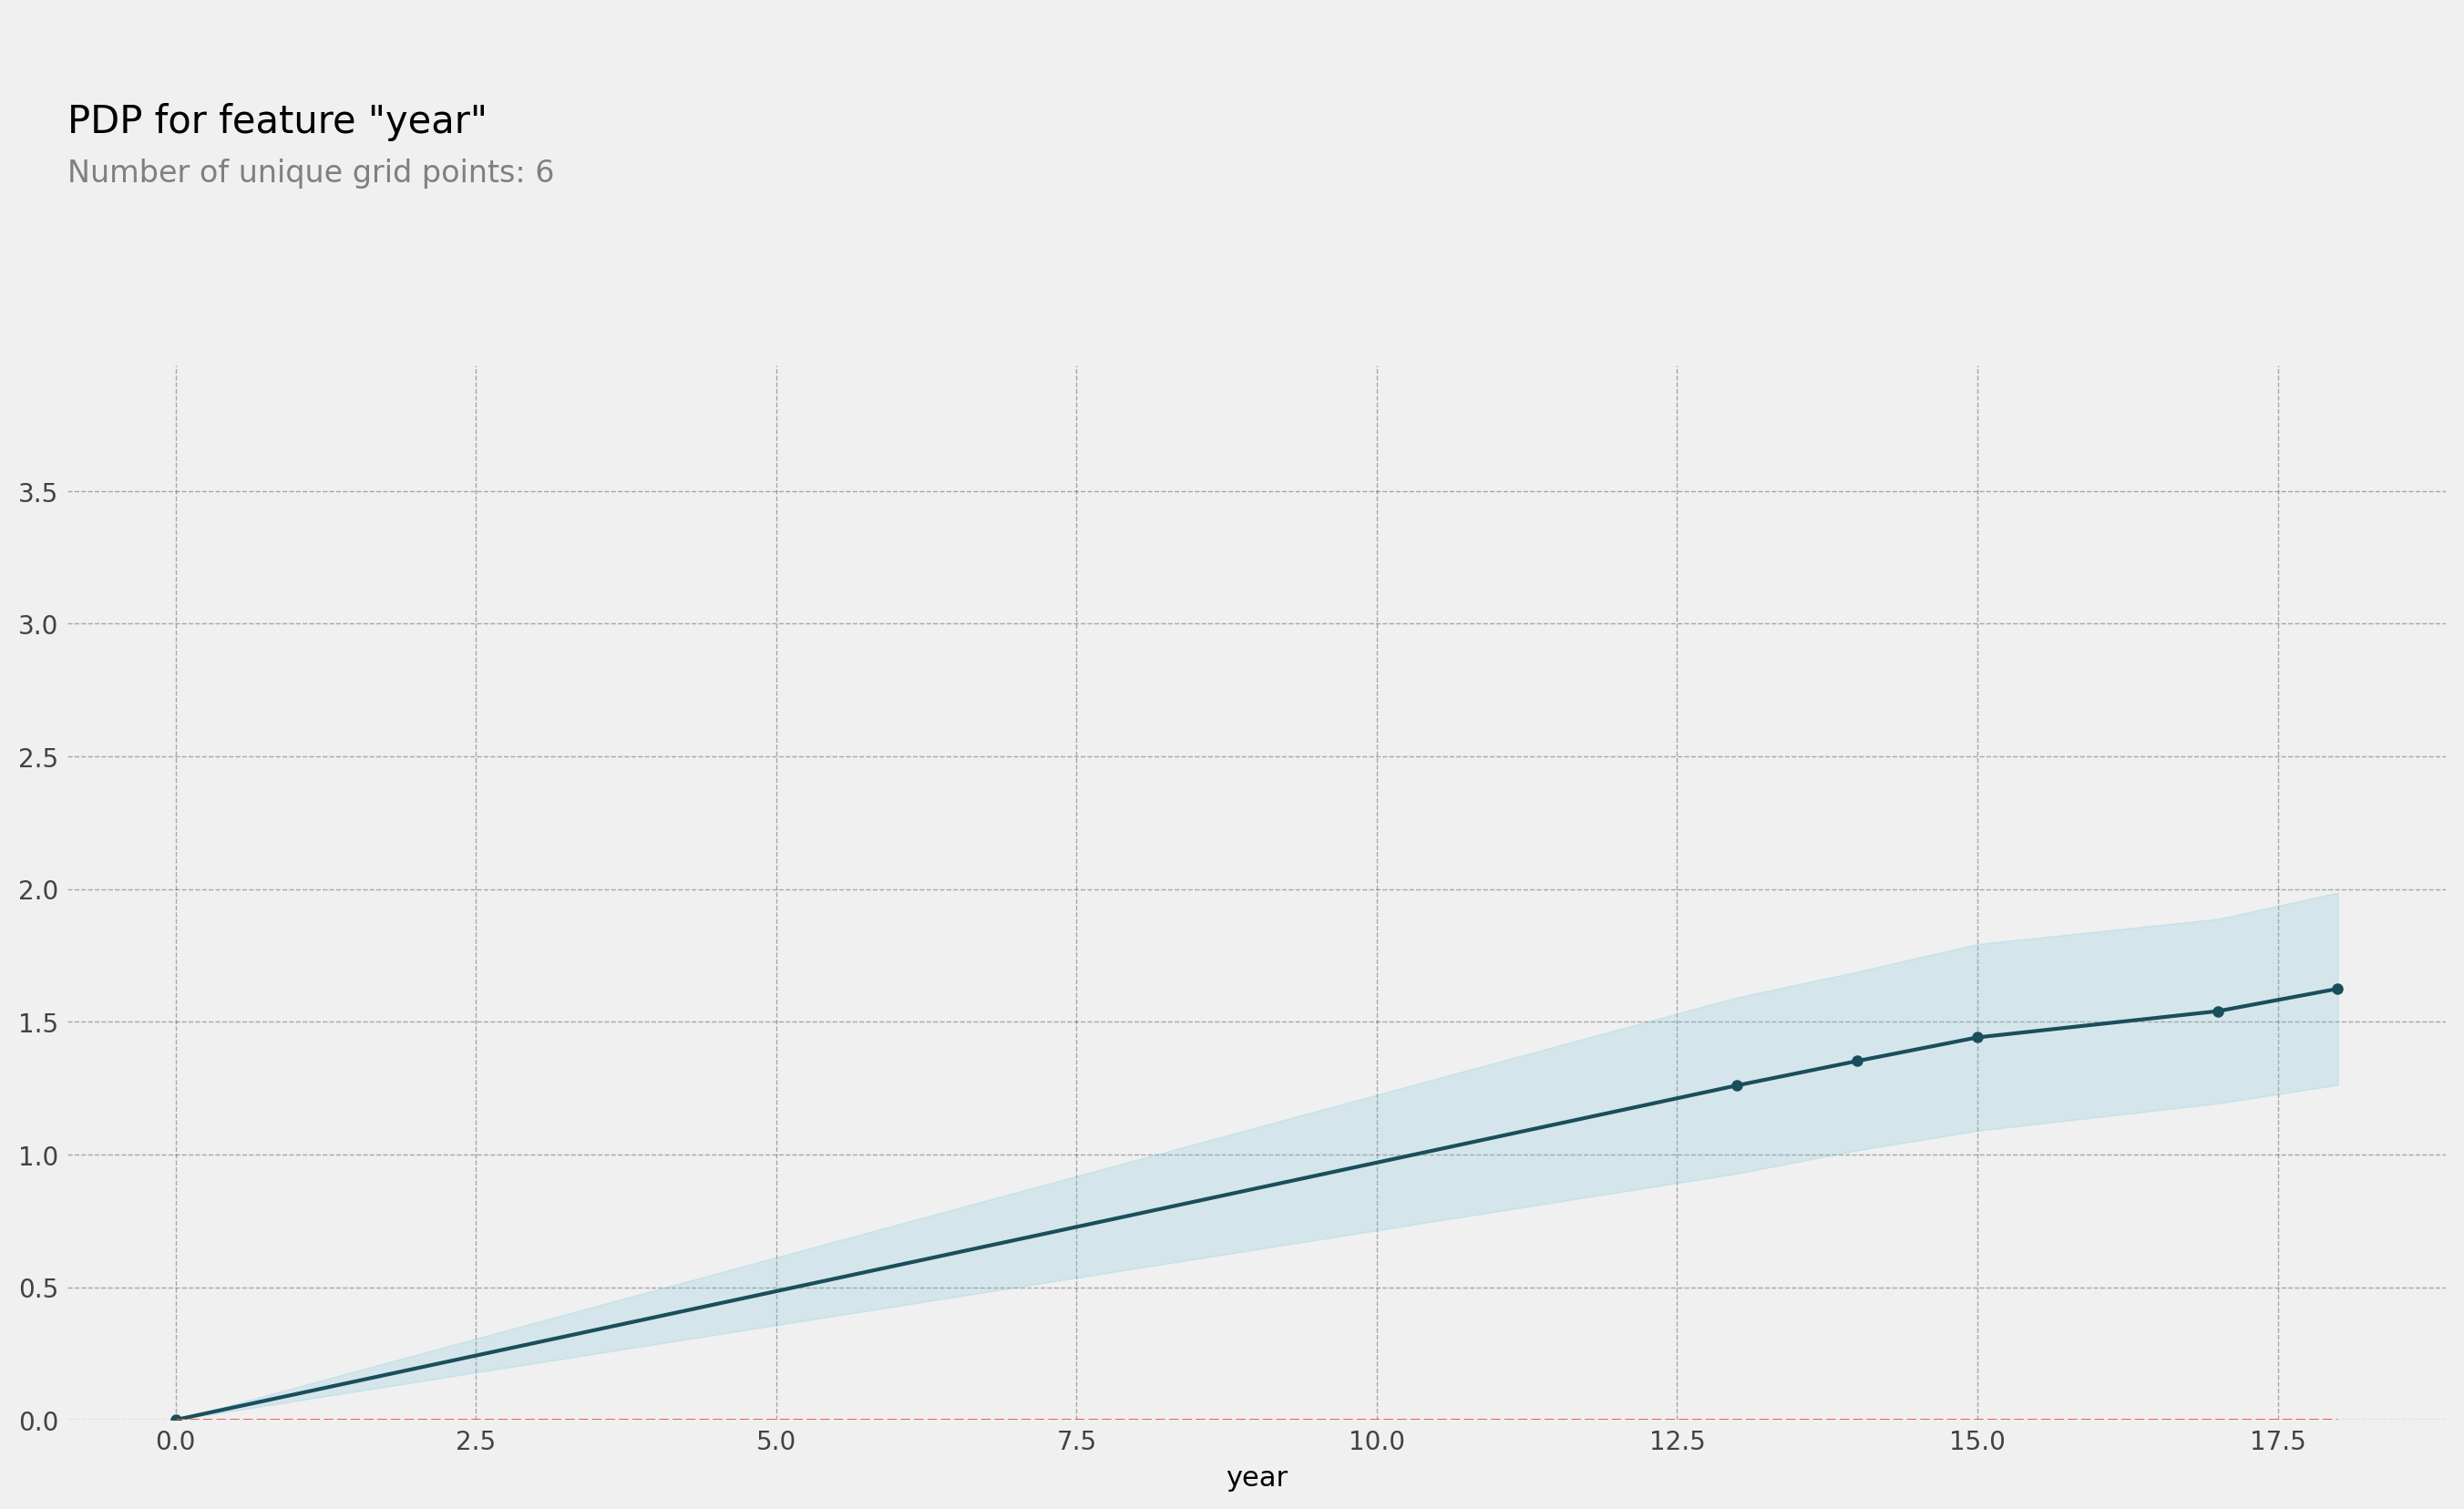

In [258]:
# year
# Numpy array를 Pandas DataFrame으로 변환
x_train_encoded_df = pd.DataFrame(x_train_encoded, columns=X_train.columns)

# PDP Isolate plot 생성
isolated = pdp_isolate(
    model=XGB[1],
    dataset=x_train_encoded_df,
    model_features=X_train.columns,
    feature='year',
    grid_type="percentile",  
    num_grid_points=10
)
pdp_plot(isolated, feature_name='year');

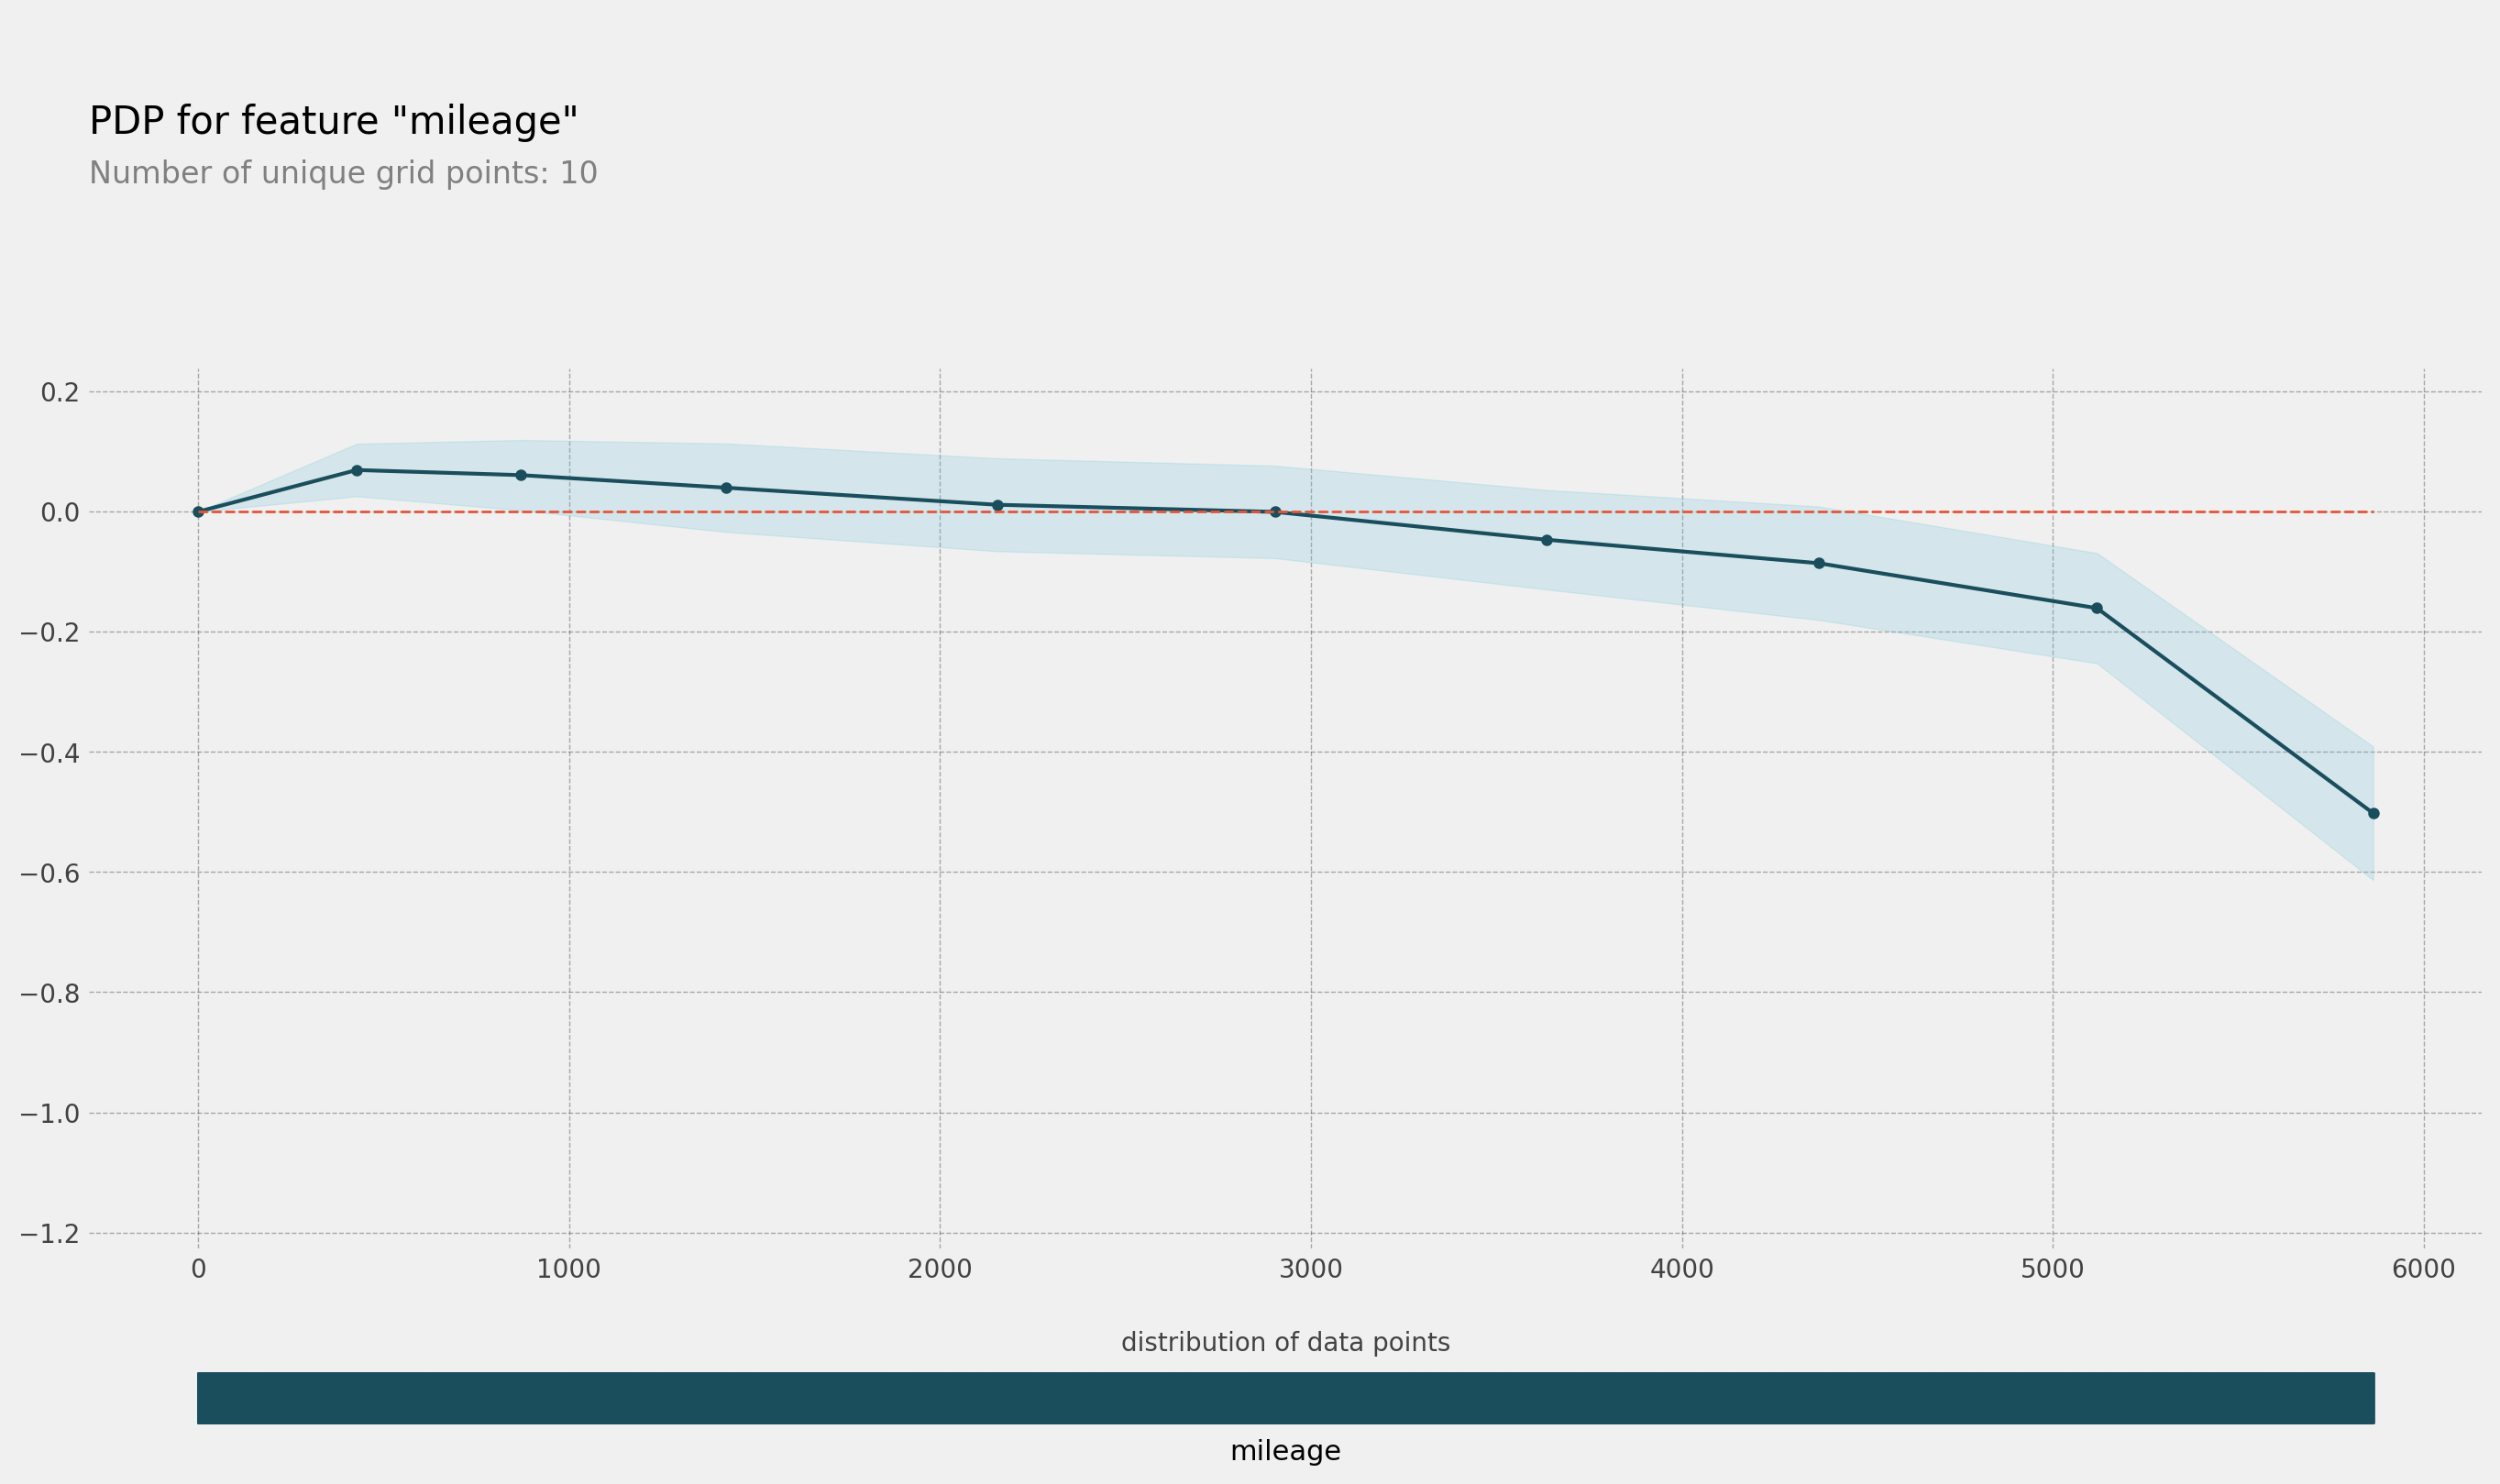

In [259]:
# mileage
x_train_encoded_df = pd.DataFrame(x_train_encoded, columns=X_train.columns)

isolated = pdp_isolate(
    model=XGB[1],
    dataset=x_train_encoded_df,
    model_features=X_train.columns,
    feature='mileage',
    grid_type="percentile",  
    num_grid_points=10
)
pdp_plot(isolated, feature_name='mileage', plot_pts_dist=True);

In [260]:
from sklearn.inspection import PartialDependenceDisplay, partial_dependence
# 변수 중요도 plot
def plot_feature_importance(importance, names, topn = 'all'):
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_temp = pd.DataFrame(data)

    fi_temp.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_temp.reset_index(drop=True, inplace = True)

    if topn == 'all' :
        fi_df = fi_temp.copy()
    else :
        fi_df = fi_temp.iloc[:topn]

    plt.figure(figsize=(10,8))
    sns.barplot(x='feature_importance', y='feature_names', data = fi_df)

    plt.xlabel('importance')
    plt.ylabel('feature names')
    plt.grid()

    return fi_df



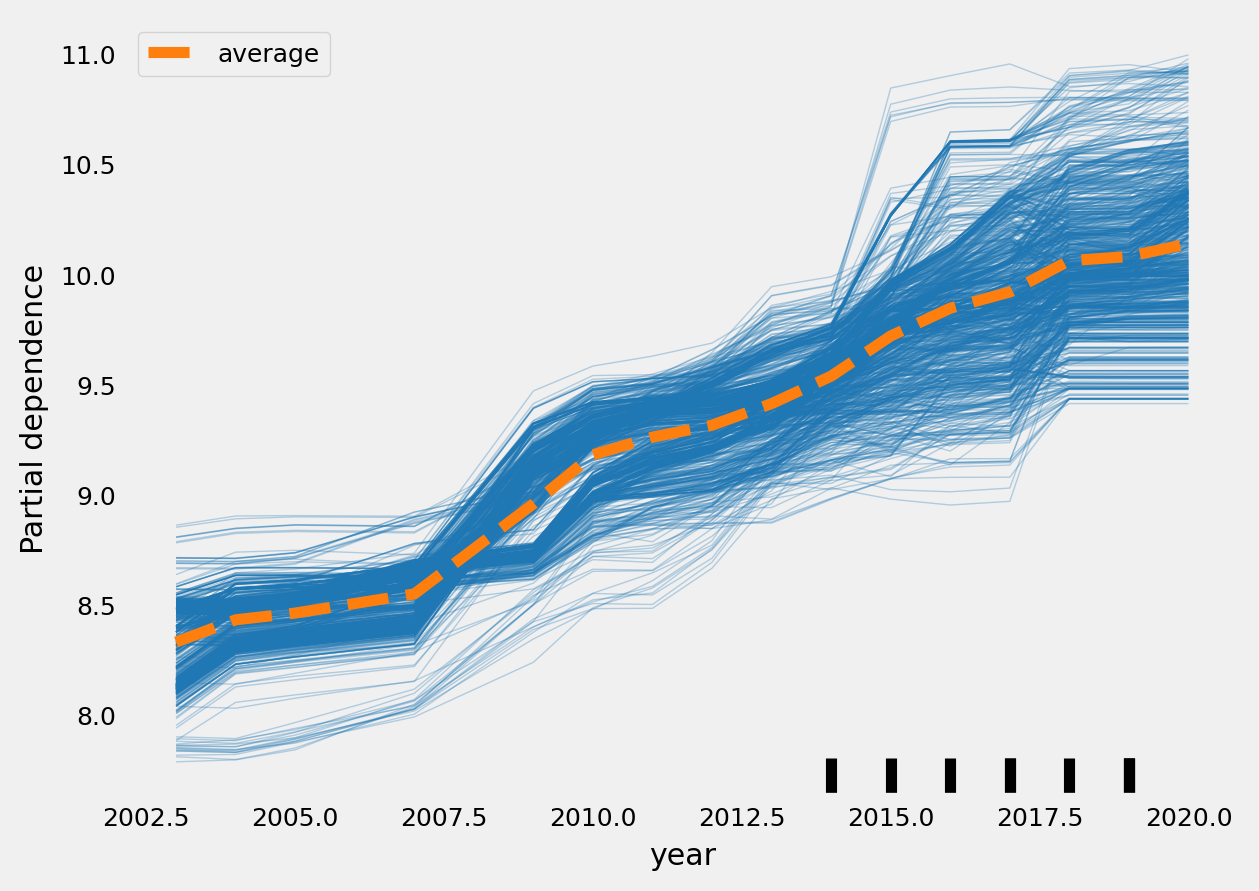

In [271]:
# year
var = 'year'
PartialDependenceDisplay.from_estimator(rf_reg, X_train.sample(1000), [var], kind="both")
plt.grid()
plt.show()

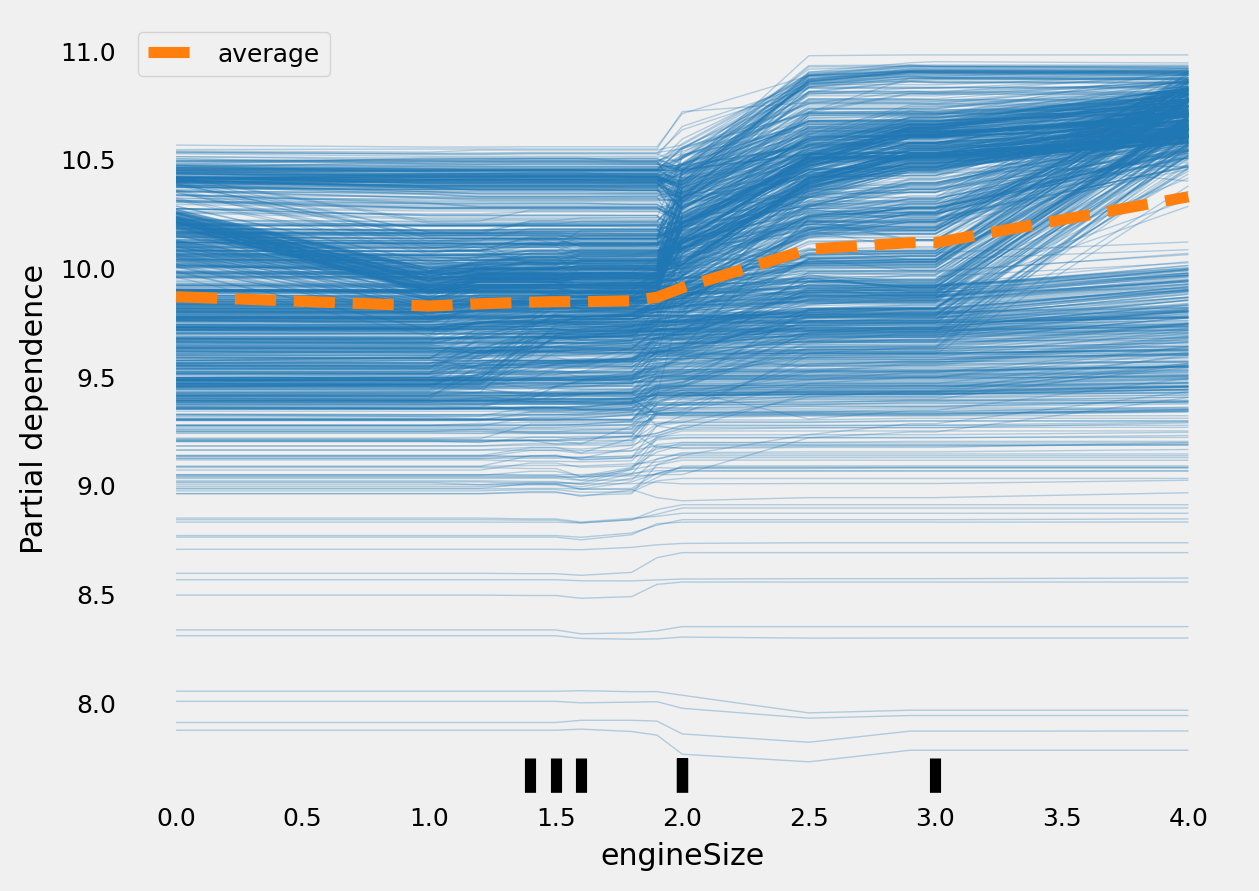

In [272]:
# engineSize
var = 'engineSize'
PartialDependenceDisplay.from_estimator(rf_reg, X_train.sample(1000), [var], kind="both")
plt.grid()
plt.show()

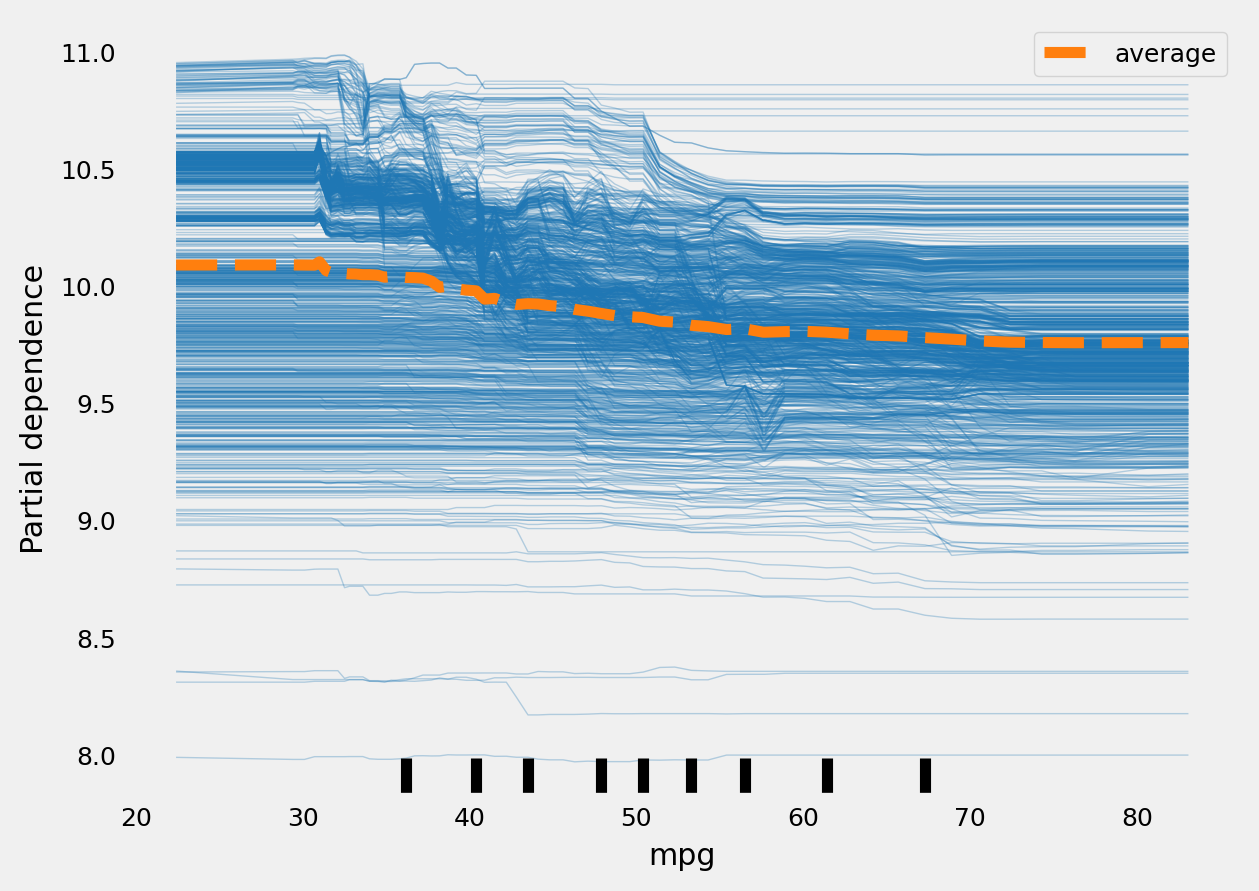

In [274]:
# mpg
var = 'mpg'
PartialDependenceDisplay.from_estimator(rf_reg, X_train.sample(1000), [var], kind="both")
plt.grid()
plt.show()

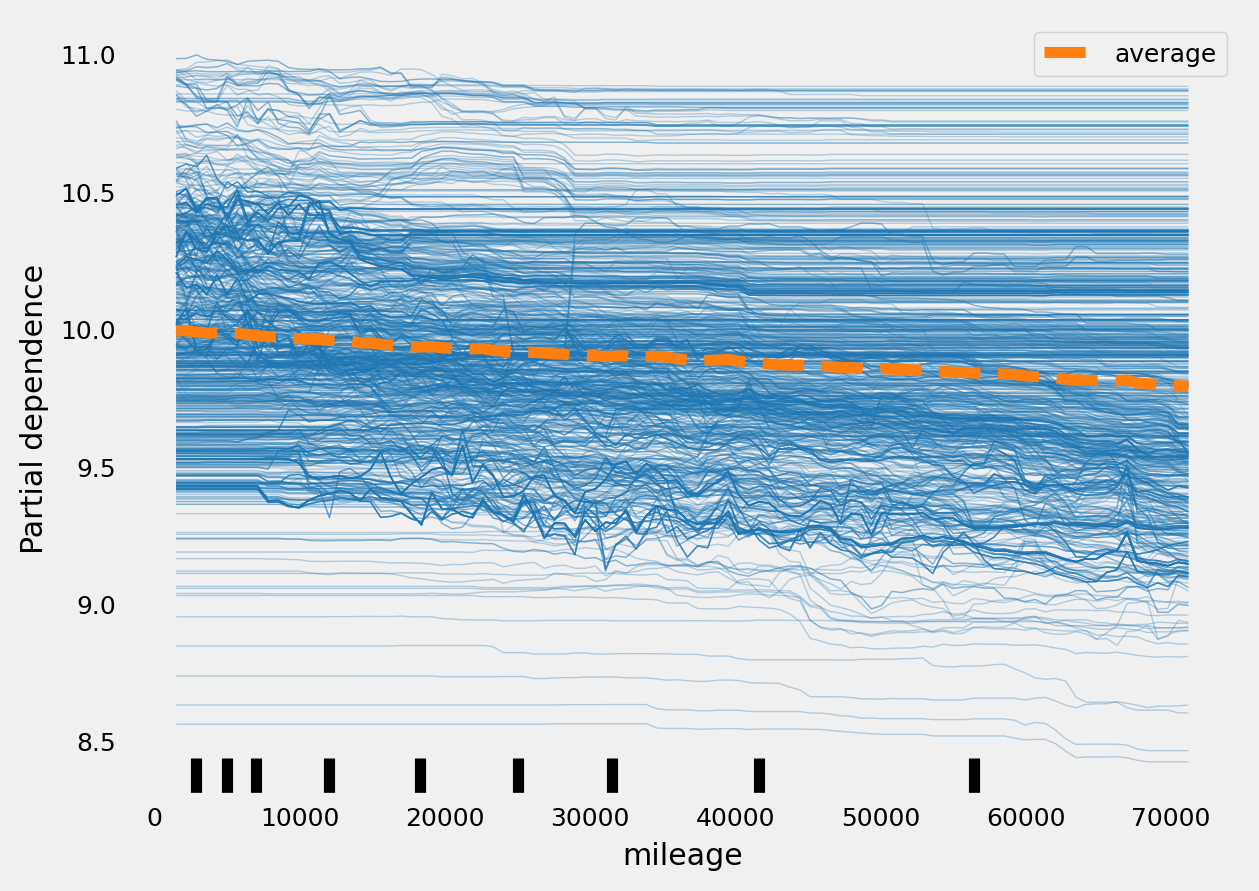

In [275]:
# mileage
var = 'mileage'
PartialDependenceDisplay.from_estimator(rf_reg, X_train.sample(1000), [var], kind="both")
plt.grid()
plt.show()

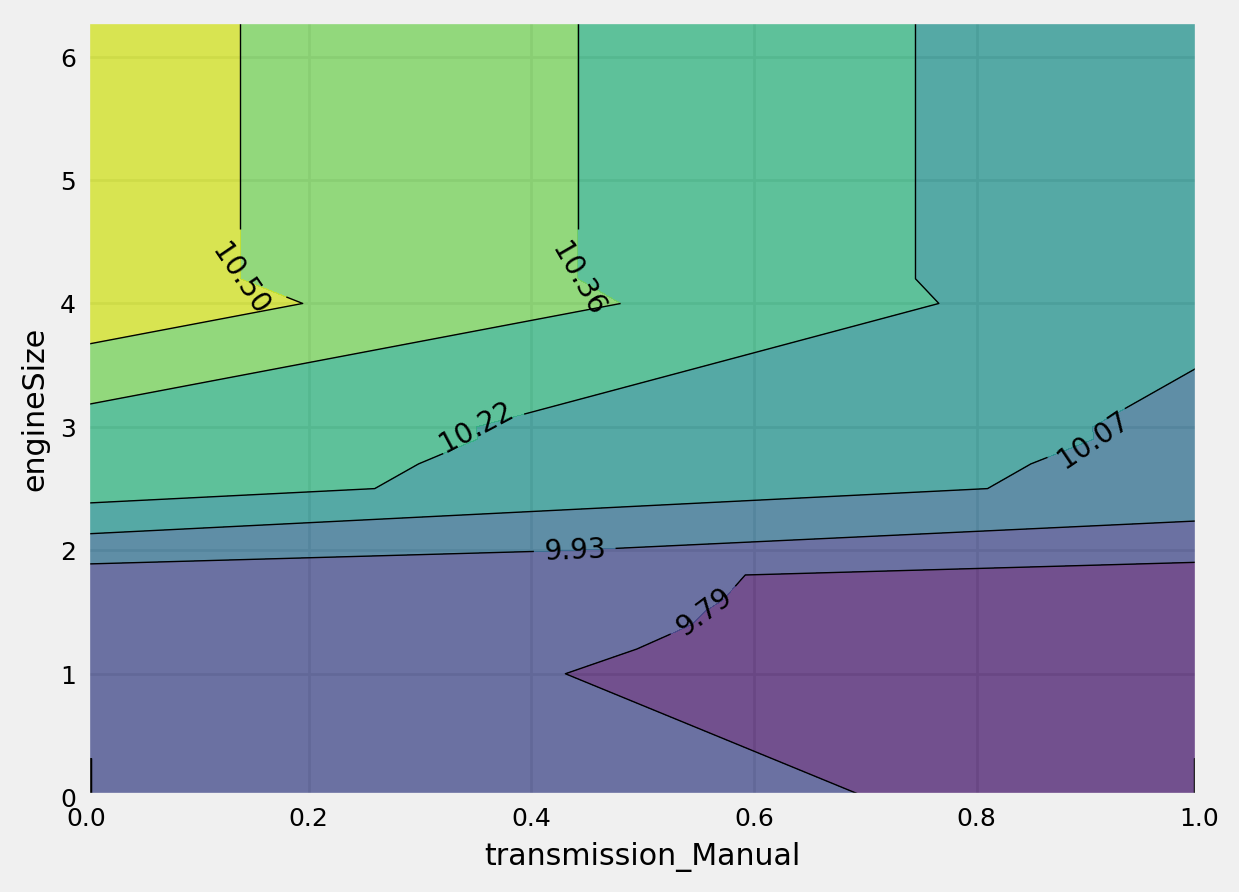

In [267]:
#기어 _수동여부, 엔진사이즈-- 기어가 수동이 아니고, 엔진 사이즈가 클수록 가격 높음 
vars =[('transmission_Manual','engineSize')]
PartialDependenceDisplay.from_estimator(rf_reg, x_train.sample(1000), vars)
plt.show()

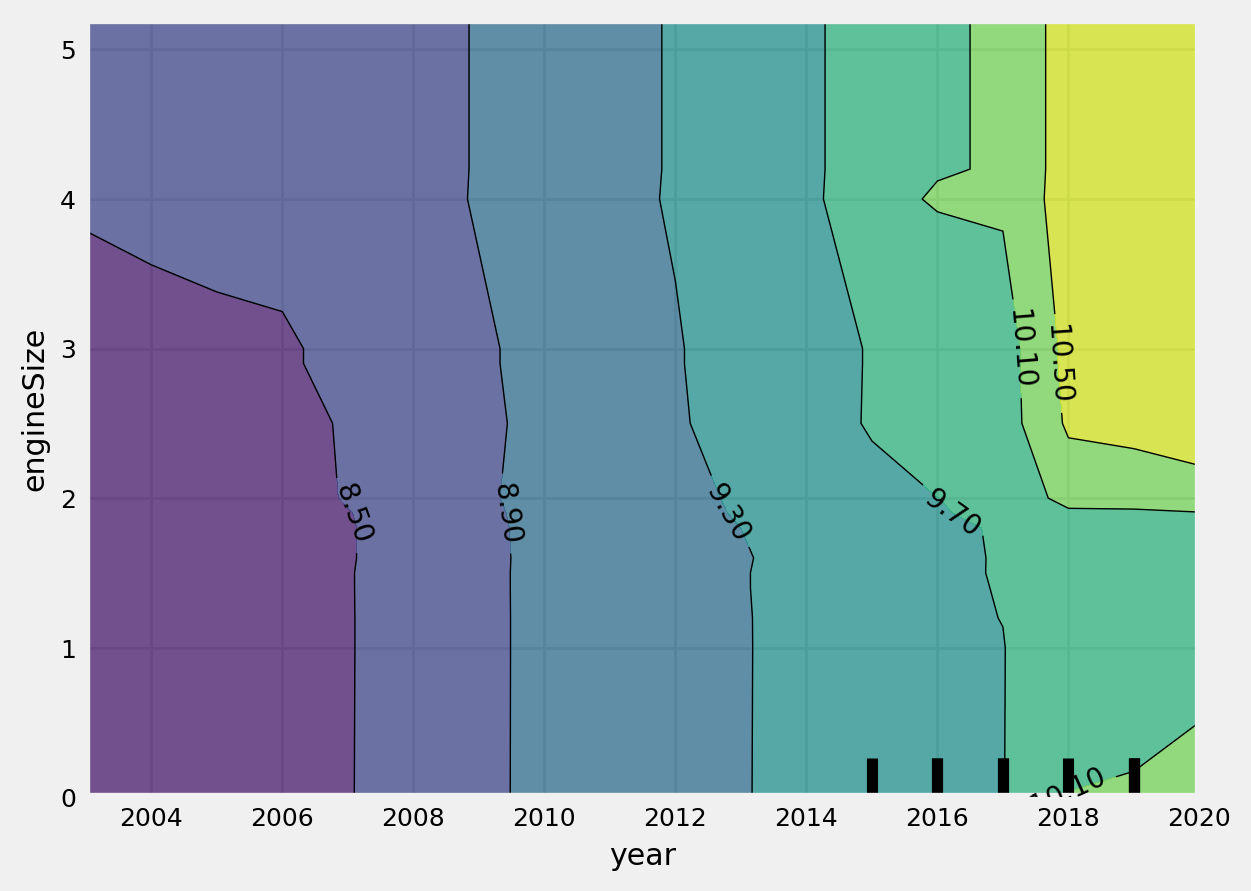

In [268]:
# 연식, 엔진사이즈  최신연식, 엔진사이즈 클수록 높다
vars =[('year','engineSize')]
PartialDependenceDisplay.from_estimator(rf_reg, x_train.sample(1000), vars)
plt.show()

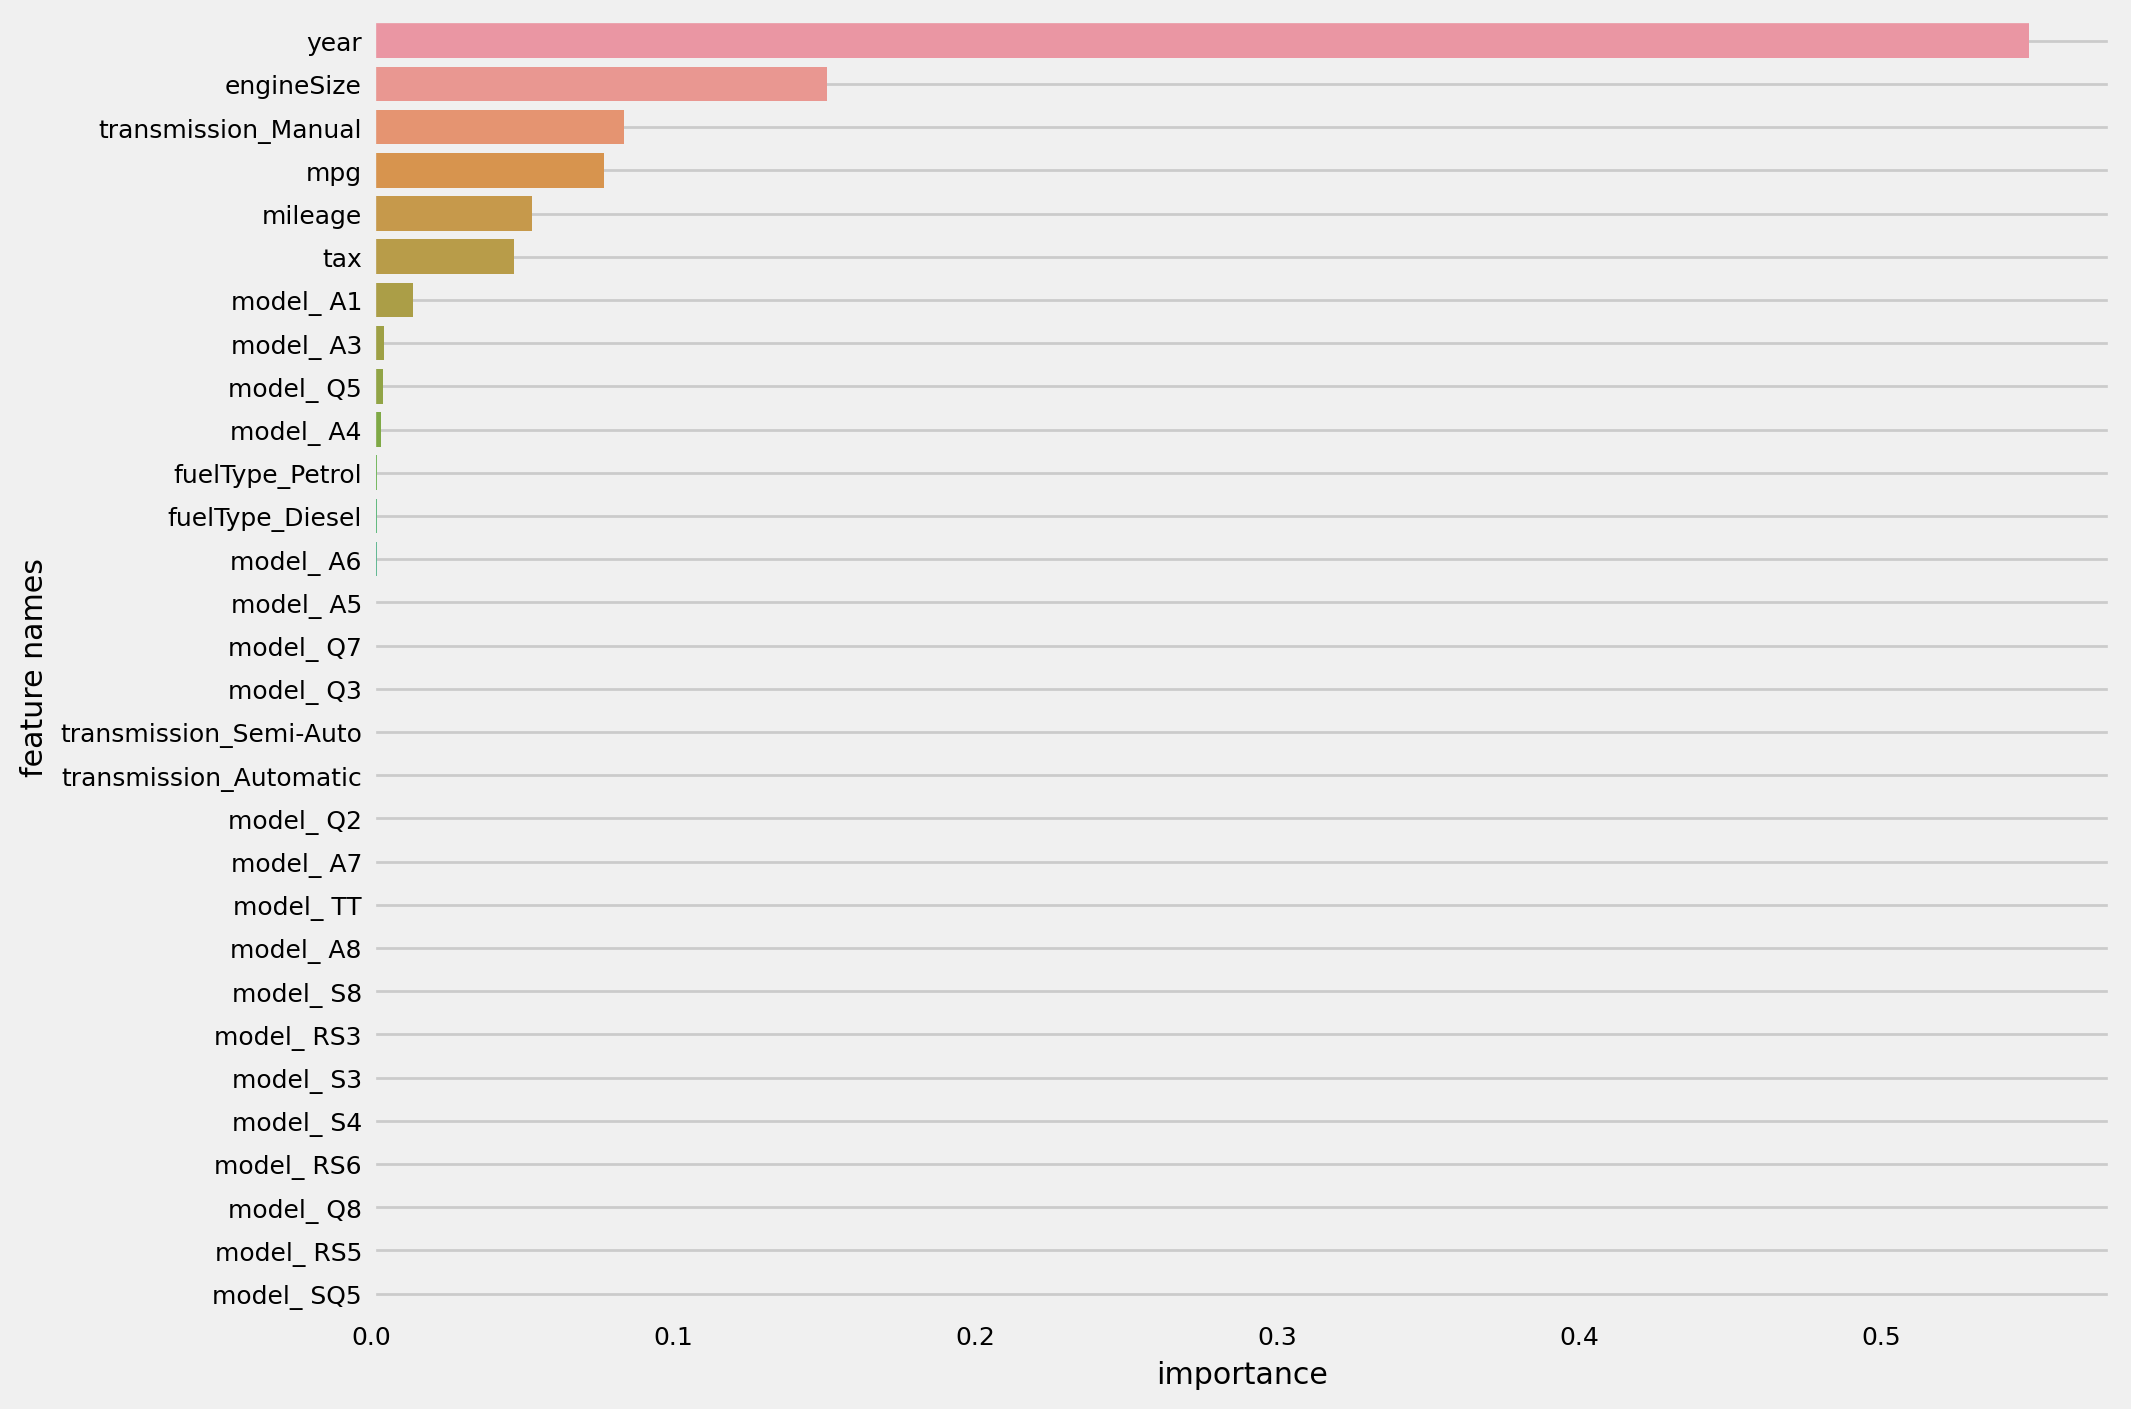

In [261]:
# 가장 성능 좋았던 랜덤 포레스트 모델의 변수 중요도 확인- 
f1 = plot_feature_importance(rf_reg.feature_importances_, list(x_train), 30)

In [262]:
# 전체 변수 상위 5개가 의미있는 중요도 
f1.head()

feature_names  feature_importance
0                 year            0.548946
1           engineSize            0.150854
2  transmission_Manual            0.083695
3                  mpg            0.076912
4              mileage            0.053242